<a href="https://colab.research.google.com/github/Data-Science-Specialist/Solar-activity-study/blob/main/%22%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D0%B9_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B7%D0%B0_%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4_01_01_2019_30_06_2023_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Содержание:

***Введение***
   
   **Парсинг данных:**

  * Парсинг вспышек на Солнце за 2019 - 2023 (30.06.2023) гг.

  * Парсинг активных пятен на Солнце за 2019 - 2023 (30.06.2023) гг.
    
  * Парсинг магнитных бурь за 2019 - 2023 (30.06.2023) гг.
  
**Очистка и предобработка данных**

**EDA**

## Введение

В исследовании солнечной активности взят период от начала текущего 25-го солнечного цикла - 2019 год и по 30.06.2023 (правильнее сказать, 2019 год - год минимума в 11-летнем солнечном цикле, то есть 24 цикл закончился и начинается 25).

Цель исследования:
* проанализировать данные о солнечных вспышках, активных пятнах на Солнце и электромагнитной активности, полученные с 2019 года;
* изучить зависимости активных пятен на Солнце и электромагнитных данных.

Материалы для исследования взяты с общедоступного интернет-ресурса: https://tesis.xras.ru/sun_flares.html. Основным источником информации о солнечных вспышках является группировка аппаратов GOES, работающая по заказу NOAA (национальное агентство США, выполняющее функции, близкие к функциям Росгидромета). Информация о магнитных бурях предоставляется на основе планетарного индекса, являющегося интегральным по нескольким центрам, расположенных в разных географических положениях.


### Опсиание

Циклы активности Солнца открыл швейцарский астроном Рудольф Вольф в 1843 году. Он установил, что их продолжительность составляет около 11 лет, и отследил историю солнечной цикличности до 1749 года. Этот год астрономы считают началом цикла под условным номером один.

**Добавлю описание к терминам и понятиям, встречающимся в данной работе.**

1.  **Описание магнитного шторма по индексу** (описание предоставляет сайт https://tesis.xras.ru/sun_vocabulary.html?topic=8&news_id=921). Шкала силы магнитных бурь была введена Национальной Океанической и Атмосферной Администрацией США (National Oceanic and Atmospheric Administration; NOAA) в ноябре 1999 года.

Магнитные бури уровня G5 (экстремально сильные бури):

* возможны разрушения энергетических систем и повреждения трансформаторов;
* обширный поверхностный заряд, проблемы с ориентацией, связью и слежением за космическими кораблями;
* токи через трубопроводы достигают сотен ампер, один или два дня невозможна высокочастотная связь во многих районах, ухудшение точности спутниковых систем навигации, низкочастотная радио-навигация выходит из строя на несколько часов, полярные сияния видны вплоть до экватора.
Kp = 9

Магнитные бури уровня G4 (очень сильные бури):
* возможны проблемы со стабильностью напряжения, частичные разрушения энергетических систем и отключение защитных систем;
* поверхностный заряд и проблемы слежения и ориентации, необходима коррекция;
* наведенные токи в трубопроводах требуют мер защиты, спорадическое прохождение ВЧ радиоволн, ухудшение спутниковой навигации на несколько часов, отказ низкочастотной радионавигации, и полярные сияния видны до тропиков.
Kp = 8

Магнитные бури уровня G3 (сильные бури):
* неoбходима коррекция напряжения, ложные срабатывания систем защиты и высокий "газ в масле" в масляных трансформаторах;
* поверхностный заряд на элементах космических аппратов, увеличение сноса аппарата с орбиты, проблемы ориентации;
* перерывы в спутниковой навигации и проблемы низкочастотной радионавигации, прерывания ВЧ радиосвязи, полярные сияния видны до средних широт.
Kp = 7

Магнитные бури уровня G2 (умеренные бури):
* воздействуют на энергетические системы, расположенные на высоких широтах;
* необходимы корректирующие действия с центров управления, отличия от прогнозируемого орбитального сноса космических аппаратов;
* ухудшение распространения ВЧ радиоволн на высоких широтах, полярные сияния видны до широты 50 градусов.
Kp = 6

Магнитные бури уровня G1 (слабые бури):
* слабые флуктуации в энергетических системах;
* небольшие влияния на системы управления космическими аппаратами;
* полярные сияния видны на высоких широтах (до 60 градусов), влияние на начало миграций животных.
Kp = 5

K (Planetary K Index) - планетарный индекс К. Агентство NOAA передаёт значения от 0 до 9. Этот индекс показывает степень нарушения магнитного поля Земли в горизонтальной составляющей. Значение измеряется в нТл с помощью магнитометра в течение трех-часового интервала, а затем преобразуется в фактор.

A (Planetary A Index) - планетарный индекс А. Агенство NOAA сообщают в центр обработки информации значения от 0 до 400. Планетарный индекс А показывает ежедневный средний уровень геомагнитной активности. Используется 8 различных показаний и выдаётся усреднённое значение за 3 часа индекса (магнитная величина, измеряемая в nanotesla или нТл), чтобы обеспечить уровень нестабильности в пределах геомагнитного поля Земли. При использовании совместно с K-индексом необходимо обращать внимание на то, что, если оба индекса имеют высокие значения, то геомагнитное поле Земли неустойчиво. Это скажется на том, что ВЧ-сигналы будут склонны к внезапным замираниям, и некоторые трассы (имеется ввиду трасса Земля-Луна-Земля) будут закрыты. Резкое возрастание индекса K при низком значении индекса А указывает на внезапное, резкое возмущение геомагнитного поля, которое может вызвать интенсивное, но кратковременные перебои, вызвать появление северного сияния. Обновляется значение один раз в день.

2. **Описание магнитных типов группы пятен** (описание взято с сайта https://www.spaceweatherlive.com/ru/pomoshch/magnitnaya-klassifikaciya-solnechnyh-pyaten.html). Классификацию областей солнечных пятен разработали в обсерватории Маунт-Вильсон, Калифорния (США). Солнечные пятна анализируются ежедневно и каждая группа получает число, магнитную классификацию и классификацию пятна специалистами по космической погоде.

* α – Alpha: Однополярная группа солнечных пятен.
* β – Бета: Группа солнечных пятен, которая имеет положительную и отрицательную полярность (биполярная) с простым делением между полярностями.
* γ – Gamma: Сложная область, в которой положительная и отрицательная полярности распределены нерегулярно, по этому их нельзя классифицировать как биполярную группу солнечных пятен.

* β-γ – Бета-Гамма: Биполярная группа солнечных пятен, но достаточно сложная, так что ни одна силовая линия магнитного поля не может быть проведена между пятнами противоположной полярности.

* δ – Delta: Противоположной полярности в одной полутени.

* β-δ – Бета-Дельта: Группа солнечных пятен с общей бета-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.

* β-γ-δ – Бета-Гамма-Дельта: Группа солнечных пятен с бета-гамма-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.

* γ-δ – Gamma-Delta: Группа солнечных пятен с гамма-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.


3. **Описание по модифицированной системе Цюриха, зашифрованнные в аббревиатуру типа 'Bxo'**.

https://www.saga.iao.ru/glossary/?catalog=0&sowa=All&term=@882

Солнечные пятна классифицируются по размеру, форме и плотности пятен. Они классифицируются с использованием набора из трех кодированных букв (Zpc) следующим образом:

Z — модифицированный класс Цюриха с маркировкой от A до F плюс H.

А – Одиночное маленькое пятно (одиночная магнитная полярность).
Б – Очень небольшое распределение мелких пятен.
C – Два или более небольших пятен,
по крайней мере один из которых имеет заметную полутень.
D — Группа пятен среднего размера, некоторые из которых могут иметь заметные полутени. Магнитная сложность областей D-типа обычно способна вызывать вспышки C- и малоинтенсивных вспышек M-класса.
E - От умеренной до большой площади довольно сложной системы солнечных пятен,
некоторые из них имеют заметные полутени и хорошее разрешение. Часто способен производить как небольшие вспышки C-класса, так и крупные вспышки M-класса.
F – Большая или очень большая площадь сложной системы солнечных пятен. Эти регионы часто способны производить крупные вспышки X-класса, а также многочисленные крупные вспышки M-класса и множество C-класса.
классовые события (в зависимости от их магнитной сложности).
H - Одиночное солнечное пятно от большого до очень большого размера (обычно не способное вызывать значительные энергетические события). Этот тип солнечных пятен обычно проявляется на этапе умирания группы солнечных пятен.

р - тип полутени самого крупного пятна в группе.

х - Одно пятно.
р - Рудиментарный.
s - Малый симметричный.
а
- Небольшая асимметричность.
h - Большой симметричный.
к - Крупный асимметричный.

в - Относительное распределение пятен или компактность группы.

х - Одно пятно.
о - Открытая группа (разделенная довольно широким пространством).
i - Промежуточный (умеренная компактность пятен в группе).
в — Компактный (очень плотные и сложные пятна внутри группы).

4. **Описание вспышек:**

Согласно классификации, которая была предложена в 1970 году Д.Бейкером, солнечной вспышке присваивается балл — обозначение из латинской буквы и индекса за ней. Буквой может быть A, B, C, M или X в зависимости от величины пика интенсивности рентгеновского излучения.

* Солнечные вспышки A & B-класса - это самый низкий класс солнечных вспышек. Они очень распространены и не очень интересны.

* Солнечные вспышки класса С - это небольшие вспышки, которые практически не оказывают влияния на Землю. Только длительные вспышки С-класса могут привести к выбросу корональной массы но чаще всего они медленны, слабы и редко вызывают на Земле значительные геомагнитные возмущения.

* Солнечные вспышки M-класса - это средние из больших вспышек. Они вызывают от небольшого (R1) до умеренного (R2) уровня радиопомех на дневной стороне Земли. Некоторые вспышки M-класса могут вызвать солнечный радиационный шторм. Сильные, длительные вспышки M-класса, с большой долей вероятности могут привести к выбросу корональной массы. Если вспышка M-класса расположена вблизи центра обращенного к Земле солнечного диска и запускает выброс корональной массы в ее сторону, вероятность того, что результирующая геомагнитная буря будет достаточной силы для наблюдения северного сияния в области средних широт, достаточно высока.

* Солнечные вспышки X-класса - являются самыми большими и мощными. В среднем вспышки X-класса происходят примерно 10 раз в год и чаще встречаются при солнечном максимуме. Во время вспышки X-класса на дневной стороне Земли, уровень радиопомех сильный до экстремального (R3-R5). Если солнечная вспышка происходит вблизи центра обращенного к Земле солнечного диска, это может вызвать сильный и продолжительный шторм солнечной радиации и создать значительный выброс корональной массы который может привести к серьезным (G4) или экстремальным (G5) геомагнитным штормам на Земле.

5. **Описание перевода в значение Энергии.**

Со́лнечная вспышка — взрывной процесс выделения энергии (световой, тепловой и кинетической) в атмосфере Солнца. Вспышки так или иначе охватывают все слои солнечной атмосферы: фотосферу, хромосферу и корону Солнца. Необходимо отметить, что солнечные вспышки и корональные выбросы массы являются различными и независимыми явлениями солнечной активности.

Продолжительность импульсной фазы солнечных вспышек обычно не превышает нескольких минут, а количество энергии, высвобождаемой за это время, может достигать миллиардов мегатонн в тротиловом эквиваленте. Энергию вспышки традиционно определяют в видимом диапазоне электромагнитных волн.

Солнечные вспышки, как правило, происходят в местах взаимодействия солнечных пятен противоположной магнитной полярности или, более точно, вблизи нейтральной линии магнитного поля, разделяющей области северной и южной полярности. Частота и мощность солнечных вспышек зависят от фазы 11-летнего солнечного цикла.

 По данным сайта https://www.spaceweatherlive.com/ru/pomoshch/chto-predstavlyayut-soboy-solnechnye-vspyshki.html солнечные вспышки классифицируются следующим образом:

"Солнечные вспышки классифицируются как A, B, C, M или X в соответствии с пиковым потоком (в Ваттах на квадратный метр, Вт/м2) длинной волны от 1 до 8 Ангстрем в околоземном пространстве, как измеряется прибором XRS на борту спутник GOES-15, который находится на геостационарной орбите над Тихим океаном.

Класс пятна по	Вт/м2 между 1 и 8 Ангстрем (метрическая единица длины, равная 10^-10 м, то есть из одной десятимиллиардной (США) метра, в стомиллионной доли сантиметра):
* A	<10-7
* B	≥10-7 <10-6
* C	≥10-6 <10-5
* M	≥10-5 <10-4
* X	≥10-4 "

То есть возведя число 10 в соотвествующую степень со знаком "-" мы получим соответствующее значение Энергии. При умножении берётся крайняя левая граница интеравала.

## Импорты и открытие датасетов

In [ ]:
pip install plotly

In [ ]:
# Выводим нужные импорты
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import calendar
import ftplib
import os
from datetime import time

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
dfsun_2019 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2019.xlsx')
dfsun_2020 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2020.xlsx')
dfsun_2021 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2021.xlsx')
dfsun_2022 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2022.xlsx')
dfsun_2023 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2023.xlsx')

dfsun_2019m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2019m.xlsx')
dfsun_2020m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2020m.xlsx')
dfsun_2021m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2021m.xlsx')
dfsun_2022m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2022m.xlsx')
dfsun_2023m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2023m.xlsx')

dfact_2019 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2019.xlsx')
dfact_2020 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2020.xlsx')
dfact_2021 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2021.xlsx')
dfact_2022 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2022.xlsx')
dfact_2023 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2023.xlsx')

dfsun_act19 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act19.xlsx')
dfsun_act20 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act20.xlsx')
dfsun_act21 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act21.xlsx')
dfsun_act22 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act22.xlsx')
dfsun_act23 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act23.xlsx')

magnetic_storms_2019 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2019.xlsx')
magnetic_storms_2020 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2020.xlsx')
magnetic_storms_2021 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2021.xlsx')
magnetic_storms_2022 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2022.xlsx')
magnetic_storms_2023 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2023.xlsx')

dfsun_act19dm = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act19dm.xlsx')
dfsun_act20dm = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act20dm.xlsx')
dfsun_act21dm = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act21dm.xlsx')
dfsun_act23dm = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act23dm.xlsx')

## Парсинг данных

Был произведён парсинг данных вспышек на Солнце, активных пятен и магнитных бурь за период 2019-30.06.2023. Весь код убран в целях удобочитаемости проекта и приведён лишь пример кода.

In [ ]:
'''# Создаем пустой датафрейм
sun_flares_2019 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декабрь 2019 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2019, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/sun_flares.html?m={month}&d={day}&y=2019'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'fl'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2019')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2019, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            sun_flares_2019 = pd.concat([sun_flares_2019, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(sun_flares_2019.head())
sun_flares_2019.to_excel('sun_flares_2019.xlsx')'''

"# Создаем пустой датафрейм\nsun_flares_2019 = pd.DataFrame()\n\n# Проходим по всем дням в периоде с января по декабрь 2019 года\nfor month in range(1, 13):\n    # Определяем количество дней в месяце\n    num_days = calendar.monthrange(2019, month)[1]\n    for day in range(1, num_days + 1):\n        # Отправляем GET-запрос на страницу\n        url = f'https://tesis.xras.ru/sun_flares.html?m={month}&d={day}&y=2019'\n        response = requests.get(url)\n\n        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы\n        soup = BeautifulSoup(response.content, 'html.parser')\n\n        # Находим таблицу с помощью ее атрибутов\n        table = soup.find('table', {'class': 'fl'})\n\n        # Проверяем, что таблица была найдена\n        if table is None:\n            print(f'Таблица не найдена для {day}.{month}.2019')\n        else:\n            # Преобразуем таблицу в датафрейм\n            df = pd.read_html(str(table))[0]\n\n            # Добавляем столбец с текущей датой\n 

## Очистка и предобработка данных

В данном разделе произведена очистка полученных данных от пустых столбцов, убраны пропуски и дубликаты, сделана предобработка данных  для дальнейшего исследования:

1. блок (по датасету magnetic_storms_):
* добавлено описание шторма по Kp индексу;
* выведены значения Kp-индекса в нанотесла;
* проверены данные на пропуски и дубликаты.

2. блок (по датасету dfact_):
* проверены данные на пропуски и дубликаты.

3. блок (по датасету dfsun_):
* посчитана длительность вспышки (обратим внимание на то, что на сайте время используется в формате UT+3:00 - Это Московское время, в 24-часовом формате);
* оценить излучение по баллу вспышки через оптическое излучение рентгеновских лучей в коротковолновом спектре (Вт/м^2) - перевести в значение Энергии (E).

## EDA

Исследование разбивается на 3 блока:

* анализ колличества вспышек и активных пятен по годам;
* продолжительность вспышки и излучение, тип магнитной группы;
* анализ магнитных бурь.

### 1 Блок - анализ вспышек и активных пятен по годам

#### Анализ вспышек

Построим распределения (гистограмма и диаграмм размаха) со статистичесими данными по признаку Значение Энергии по каждому году.

In [ ]:
#Построим графики чтобы посмотреть на распределение
def dist_and_box(df,col):
    global title
    fig, axs = plt.subplots(ncols=2,figsize=(15,5))
    sns.set(font_scale=1.10)
    displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);
    sns.boxplot(df[col], ax=axs[1]).set_title(f'Признак {title}',fontsize=20)

<ipython-input-13-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


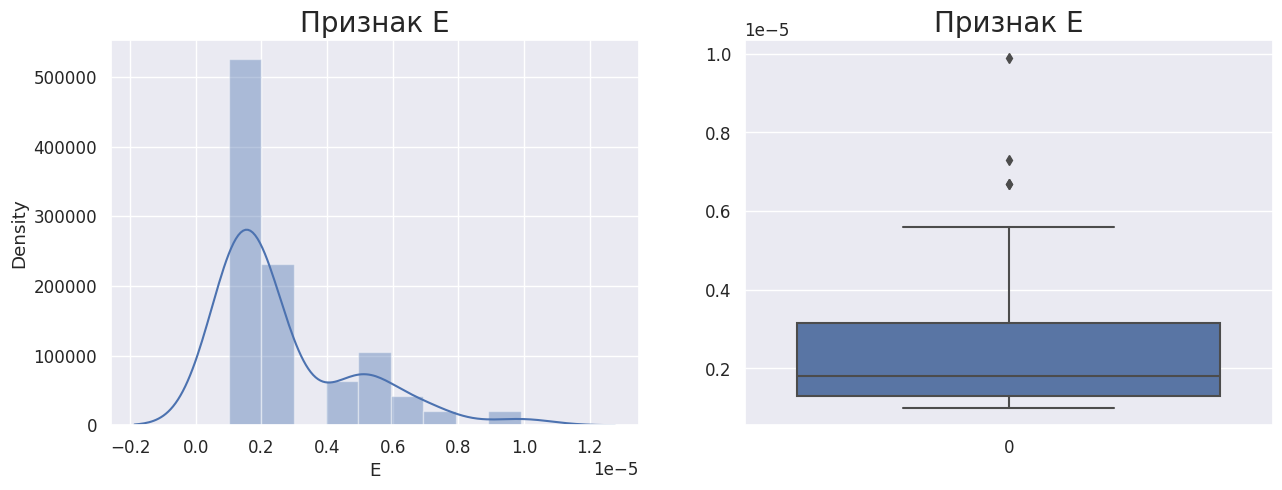

In [ ]:
df = dfsun_2019
title = 'E'
dist_and_box(dfsun_2019,'E')

In [ ]:
dfsun_2019.describe()

,Активная область,Балл,Класс вспышки,E
count,48.000000,48.000000,48.000000,48.000000
mean,2736.645833,2.668750,0.000001,0.000003
std,2.884217,2.073865,0.000000,0.000002
min,2732.000000,1.000000,0.000001,0.000001
25%,2734.000000,1.300000,0.000001,0.000001
50%,2736.000000,1.800000,0.000001,0.000002
75%,2740.000000,3.150000,0.000001,0.000003
max,2741.000000,9.900000,0.000001,0.000010


Распределение скошено вправо, стандартное квадратичное отклонение близко к среднему. Всего лишь три выброса свыше 75%-го квартиля.

<ipython-input-40-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


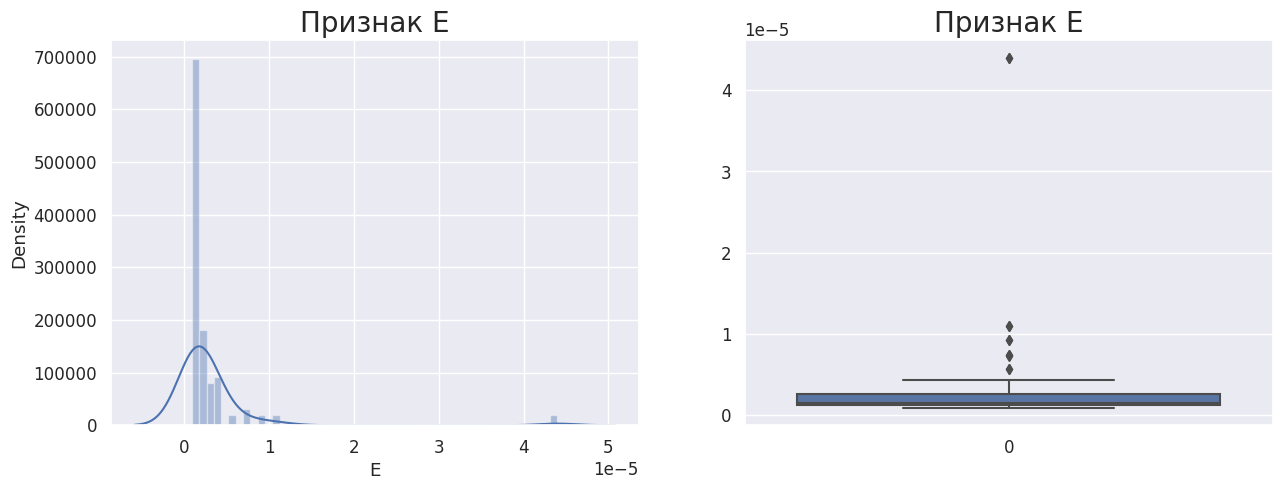

In [ ]:
df = dfsun_2020
title = 'E'

dist_and_box(dfsun_2020,'E')

In [ ]:
dfsun_2020.describe()

,Активная область,Балл,Класс вспышки,E
count,115.000000,115.000000,115.000000,1.150000e+02
mean,2370.643478,2.182609,0.000001,3.043478e-06
std,991.696289,1.667768,0.000002,5.828366e-06
min,0.000000,0.900000,0.000001,9.000000e-07
25%,2778.000000,1.200000,0.000001,1.200000e-06
50%,2781.000000,1.500000,0.000001,1.500000e-06
75%,2785.500000,2.550000,0.000001,2.600000e-06
max,2792.000000,9.300000,0.000010,4.400000e-05


Распределение скошено вправо, стандартное квадратичное отклонение не близко к среднему, что значит значения разбросаны около среднего. Однако наблюдается  уже 5 выбросов. Одно значение проявилось в максимуме отдельным пиком.

<ipython-input-40-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


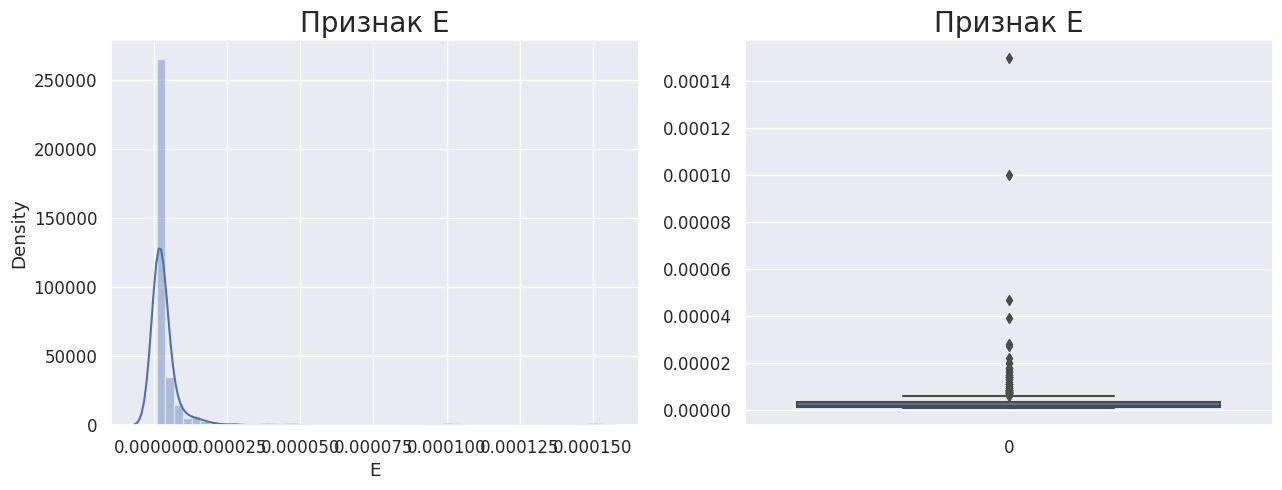

In [ ]:
df = dfsun_2021
title = 'E'

dist_and_box(dfsun_2021,'E')

In [ ]:
dfsun_2021.describe()

,Активная область,Балл,Класс вспышки,E
count,521.000000,521.000000,521.000000,5.210000e+02
mean,2591.976967,2.355278,0.000002,3.721689e-06
std,855.276754,1.719184,0.000006,8.827000e-06
min,0.000000,0.900000,0.000001,9.000000e-07
25%,2826.000000,1.300000,0.000001,1.300000e-06
50%,2877.000000,1.600000,0.000001,1.700000e-06
75%,2907.000000,2.800000,0.000001,3.200000e-06
max,2920.000000,9.800000,0.000100,1.500000e-04


Распределение скошено вправо, стандартное квадратичное отклонение далеко от среднего. О сильном разбросе значений говорит блочная диаграмма. Достаточно большое количество выбросов, говорит о том, что очень много значений свыше 75%-го квартиля.

<ipython-input-13-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


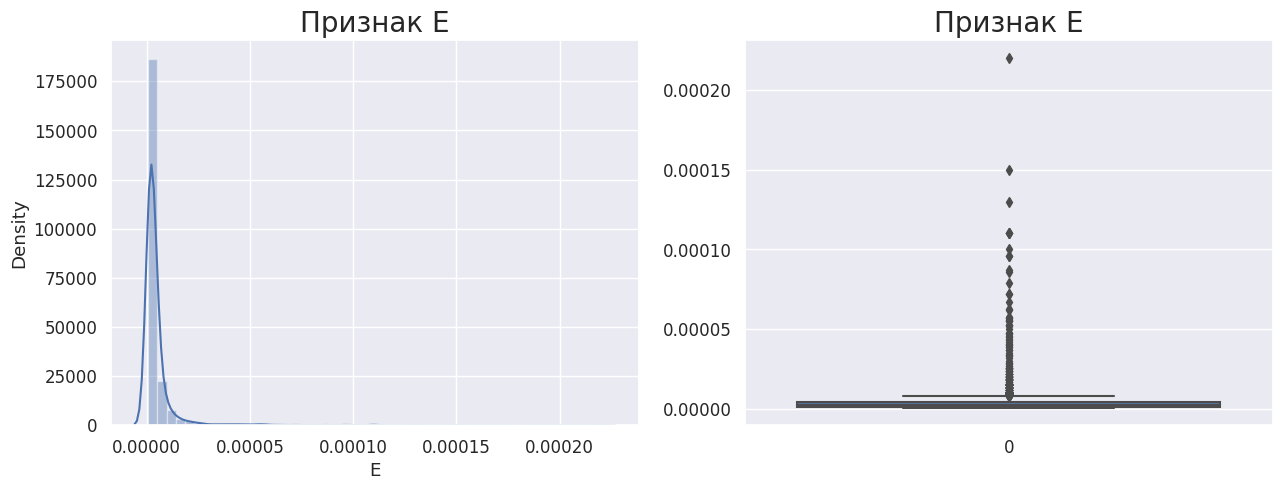

In [ ]:
df = dfsun_2022
title = 'E'

dist_and_box(dfsun_2022,'E')

In [ ]:
dfsun_2022.describe()

,Активная область,Балл,Класс вспышки,E
count,2373.000000,2373.000000,2373.000000,2.373000e+03
mean,2598.206911,2.777328,0.000002,4.856089e-06
std,1101.214569,1.827853,0.000006,1.062094e-05
min,0.000000,0.900000,0.000001,9.000000e-07
25%,2974.000000,1.400000,0.000001,1.500000e-06
50%,3055.000000,2.200000,0.000001,2.400000e-06
75%,3110.000000,3.600000,0.000001,4.300000e-06
max,3180.000000,9.900000,0.000100,2.200000e-04


Распределение скошено вправо, стандартное квадратичное отклонение далеко от среднего. О сильном разбросе значений также говорит блочная диаграмма. Картина 2022 года аналогичная 2021 году.

<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


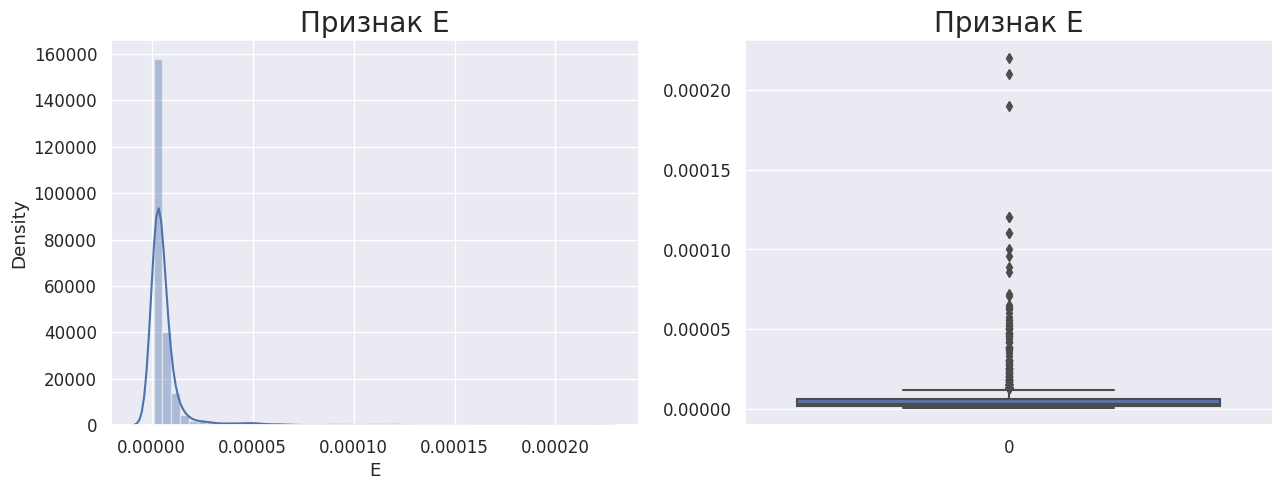

In [ ]:
df = dfsun_2023
title = 'E'

dist_and_box(dfsun_2023,'E')

In [ ]:
dfsun_2023.describe()

,Активная область,Балл,Класс вспышки,E
count,1604.000000,1604.000000,1604.000000,1.604000e+03
mean,2870.082918,3.449252,0.000003,6.726621e-06
std,1066.081913,2.064314,0.000008,1.381025e-05
min,0.000000,0.900000,0.000001,9.000000e-07
25%,3192.000000,1.800000,0.000001,2.100000e-06
50%,3256.000000,2.900000,0.000001,3.400000e-06
75%,3305.000000,4.625000,0.000001,6.200000e-06
max,3713.000000,9.900000,0.000100,2.200000e-04


Тоже самое и в 2023 году, ещё больше отдельных выбросов появилось в максимальных значениях. Распределение скошено вправо, стандартное квадратичное отклонение далеко от среднего.

Сравнительная диаграмма Значения "Е" по годам

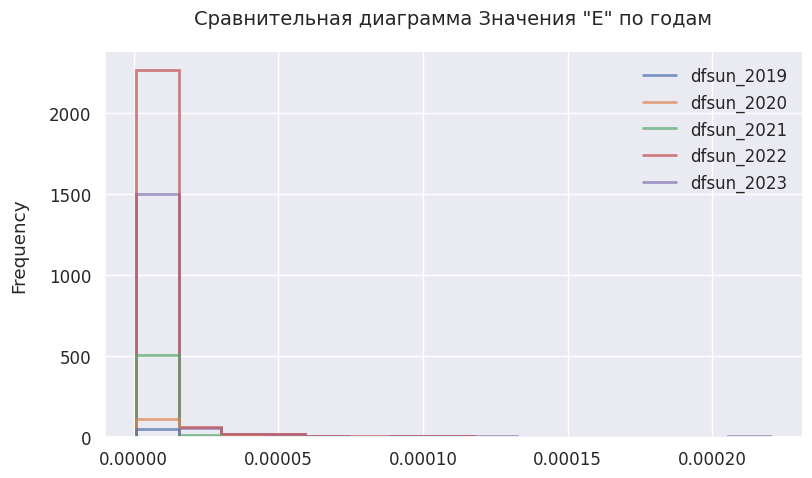

In [ ]:
from matplotlib.lines import Line2D


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist([dfsun_2019['E'], dfsun_2020['E'], dfsun_2021['E'], dfsun_2022['E'], dfsun_2023['E']], bins=15, histtype='step', linewidth=2,
        alpha=0.7, label=['dfsun_2019','dfsun_2020', 'dfsun_2021', 'dfsun_2022', 'dfsun_2023'])

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Frequency', labelpad=15)
plt.title('Сравнительная диаграмма Значения "Е" по годам', fontsize=14, pad=20)
plt.show()

По значению Е лидирует 2022 год, даже 2023 год уже приближается к значениям 2022 года. Значения Е плавно растут по годам, что совершенно логично. Солнечный максимум будет в 2025 году.

Для исследования признака Продолжительность вспышки, значения переведы в минуты.

In [ ]:
dfsun_2019m = dfsun_2019.copy()
dfsun_2019m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2019m['Продолжительность вспышки'])
dfsun_2019m['Продолжительность в минутах'] = (dfsun_2019m['Продолжительность вспышки'].dt.hour*60)+dfsun_2019m['Продолжительность вспышки'].dt.minute+(dfsun_2019m['Продолжительность вспышки'].dt.second/60)
dfsun_2019m['Продолжительность в минутах'] = dfsun_2019m['Продолжительность в минутах'].astype('int')

dfsun_2019m.sort_values(by='Продолжительность вспышки', ascending=False).head(2)

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
43,Вспышка балла C1.2,2740,2019-05-08 12:51:00,2019-05-08 13:58:00,2019-05-08,2023-10-31 01:07:00,1.2,0.000001,0.000001,67
41,Вспышка балла C1.2,2740,2019-05-07 12:51:00,2019-05-07 13:58:00,2019-05-07,2023-10-31 01:07:00,1.2,0.000001,0.000001,67


Исследование признака продолжительность в минутах. Также построим гистограммы и диаграммы размаха.

<ipython-input-8-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


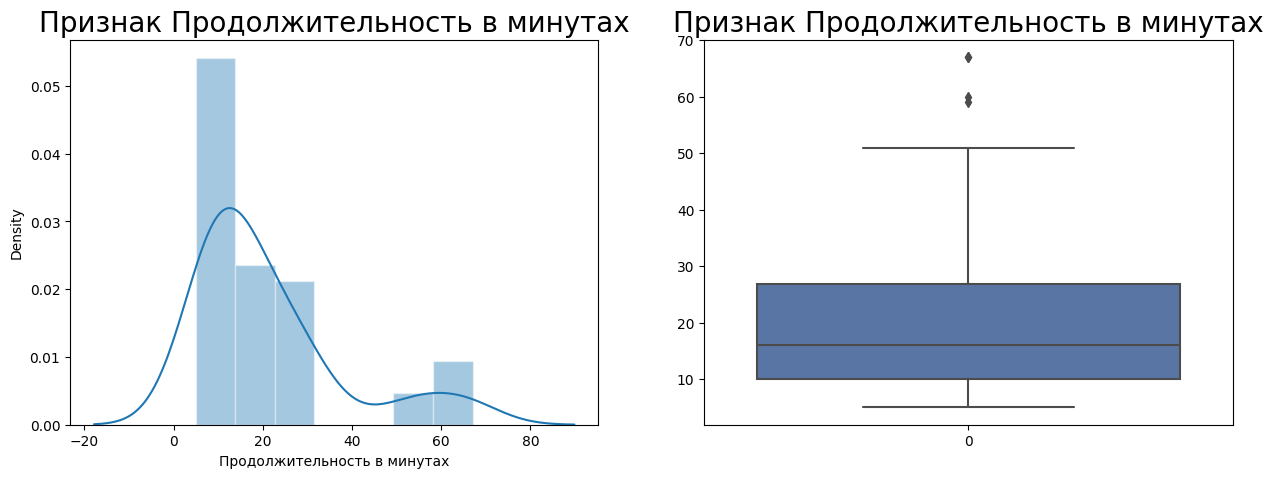

In [ ]:
df = dfsun_2019m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2019m,'Продолжительность в минутах')

In [ ]:
dfsun_2019m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2736.645833,2.668750,0.000001,0.000003,20.937500
std,2.884217,2.073865,0.000000,0.000002,16.518727
min,2732.000000,1.000000,0.000001,0.000001,5.000000
25%,2734.000000,1.300000,0.000001,0.000001,10.000000
50%,2736.000000,1.800000,0.000001,0.000002,16.000000
75%,2740.000000,3.150000,0.000001,0.000003,26.750000
max,2741.000000,9.900000,0.000001,0.000010,67.000000


In [ ]:
dfsun_2020m = dfsun_2020.copy()
dfsun_2020m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2020m['Продолжительность вспышки'])
dfsun_2020m['Продолжительность в минутах'] = (dfsun_2020m['Продолжительность вспышки'].dt.hour*60)+dfsun_2020m['Продолжительность вспышки'].dt.minute+(dfsun_2020m['Продолжительность вспышки'].dt.second/60)
dfsun_2020m['Продолжительность в минутах'] = dfsun_2020m['Продолжительность в минутах'].astype('int')

dfsun_2020m.sort_values(by='Продолжительность вспышки', ascending=False).head(2)

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
0,Вспышка балла C2.6,0,2020-11-26 22:20:00,2020-11-27 02:53:00,2020-11-26,2023-10-31 04:33:00,2.6,0.000001,0.000003,273
20,Вспышка балла C7.4,2790,2020-12-08 18:46:00,2020-12-08 20:33:00,2020-12-08,2023-10-31 01:47:00,7.4,0.000001,0.000007,107


<ipython-input-8-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


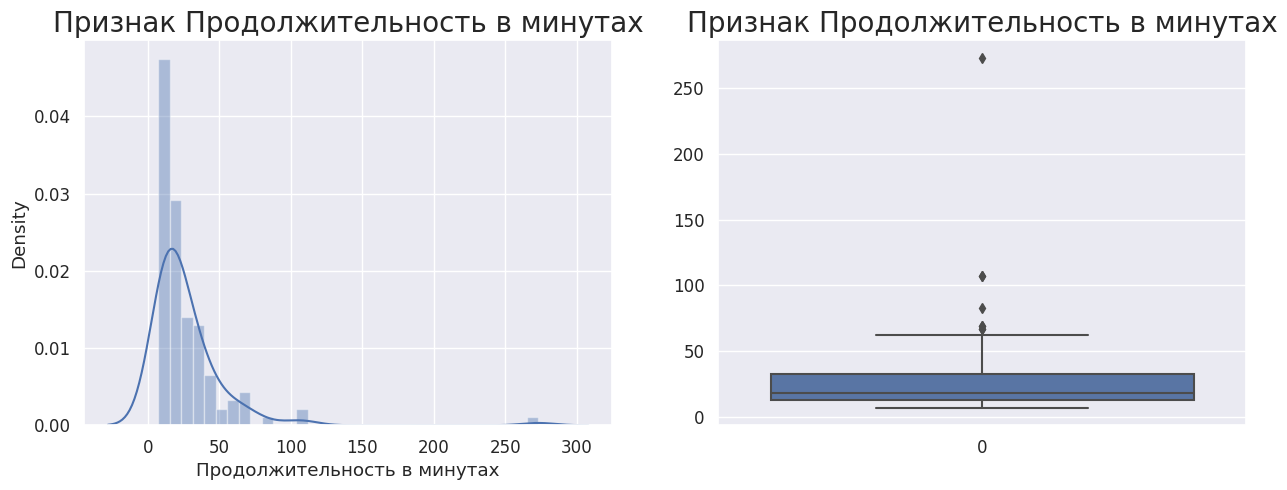

In [ ]:
df = dfsun_2020m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2020m,'Продолжительность в минутах')

In [ ]:
dfsun_2020m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,115.000000,115.000000,115.000000,1.150000e+02,115.000000
mean,2370.643478,2.182609,0.000001,3.043478e-06,27.521739
std,991.696289,1.667768,0.000002,5.828366e-06,30.179390
min,0.000000,0.900000,0.000001,9.000000e-07,7.000000
25%,2778.000000,1.200000,0.000001,1.200000e-06,13.000000
50%,2781.000000,1.500000,0.000001,1.500000e-06,18.000000
75%,2785.500000,2.550000,0.000001,2.600000e-06,33.000000
max,2792.000000,9.300000,0.000010,4.400000e-05,273.000000


In [ ]:
dfsun_2021m = dfsun_2021.copy()
dfsun_2021m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2021m['Продолжительность вспышки'])
dfsun_2021m['Продолжительность в минутах'] = (dfsun_2021m['Продолжительность вспышки'].dt.hour*60)+dfsun_2021m['Продолжительность вспышки'].dt.minute+(dfsun_2021m['Продолжительность вспышки'].dt.second/60)
dfsun_2021m['Продолжительность в минутах'] = dfsun_2021m['Продолжительность в минутах'].astype('int')

dfsun_2021m.sort_values(by='Продолжительность вспышки', ascending=False).head(2)

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
205,Вспышка балла C1.6,2871,2021-09-18 10:48:00,2021-09-19 02:48:00,2021-09-18,2023-10-31 16:00:00,1.6,0.000001,0.000002,960
51,Вспышка балла C1.3,2824,2021-05-22 10:10:00,2021-05-22 17:03:00,2021-05-22,2023-10-31 06:53:00,1.3,0.000001,0.000001,413


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


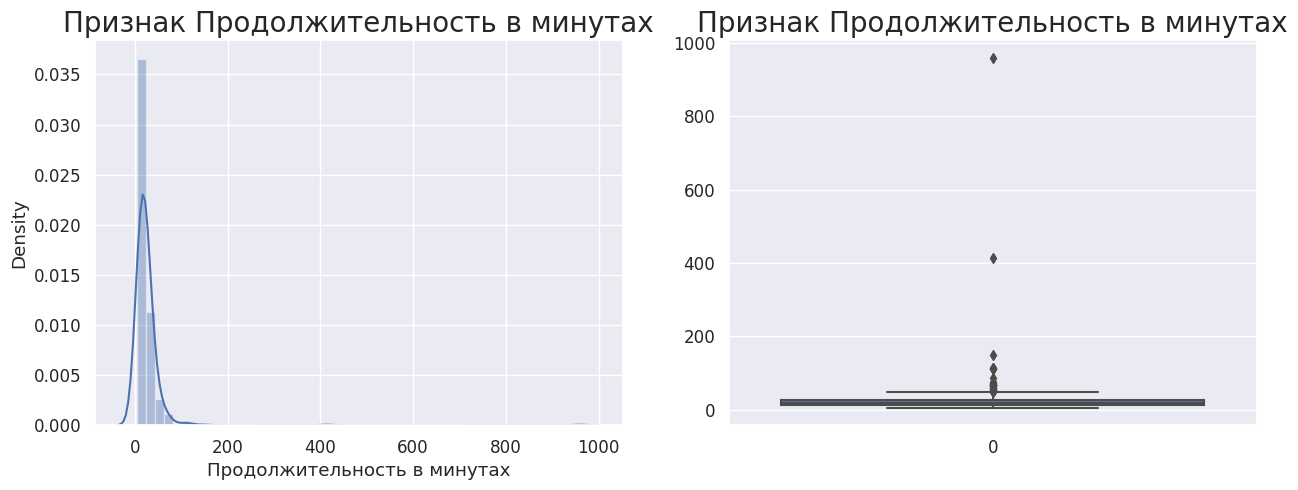

In [ ]:
df = dfsun_2021m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2021m,'Продолжительность в минутах')

In [ ]:
dfsun_2021m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,521.000000,521.000000,521.000000,5.210000e+02,521.000000
mean,2591.976967,2.355278,0.000002,3.721689e-06,24.978887
std,855.276754,1.719184,0.000006,8.827000e-06,47.299796
min,0.000000,0.900000,0.000001,9.000000e-07,5.000000
25%,2826.000000,1.300000,0.000001,1.300000e-06,13.000000
50%,2877.000000,1.600000,0.000001,1.700000e-06,18.000000
75%,2907.000000,2.800000,0.000001,3.200000e-06,27.000000
max,2920.000000,9.800000,0.000100,1.500000e-04,960.000000


In [ ]:
dfsun_2022m = dfsun_2022.copy()
dfsun_2022m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2022m['Продолжительность вспышки'])
dfsun_2022m['Продолжительность в минутах'] = (dfsun_2022m['Продолжительность вспышки'].dt.hour*60)+dfsun_2022m['Продолжительность вспышки'].dt.minute+(dfsun_2022m['Продолжительность вспышки'].dt.second/60)
dfsun_2022m['Продолжительность в минутах'] = dfsun_2022m['Продолжительность в минутах'].astype('int')

dfsun_2022m.sort_values(by='Продолжительность вспышки', ascending=False).head(2)

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
0,Вспышка балла C7.6,2996,2022-04-27 17:14:00,2022-04-28 00:27:00,2022-04-27,2023-10-31 07:13:00,7.6,0.000001,0.000008,433
589,Вспышка балла C1.3,0,2022-02-28 11:05:00,2022-02-28 18:17:00,2022-02-28,2023-10-31 07:12:00,1.3,0.000001,0.000001,432


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


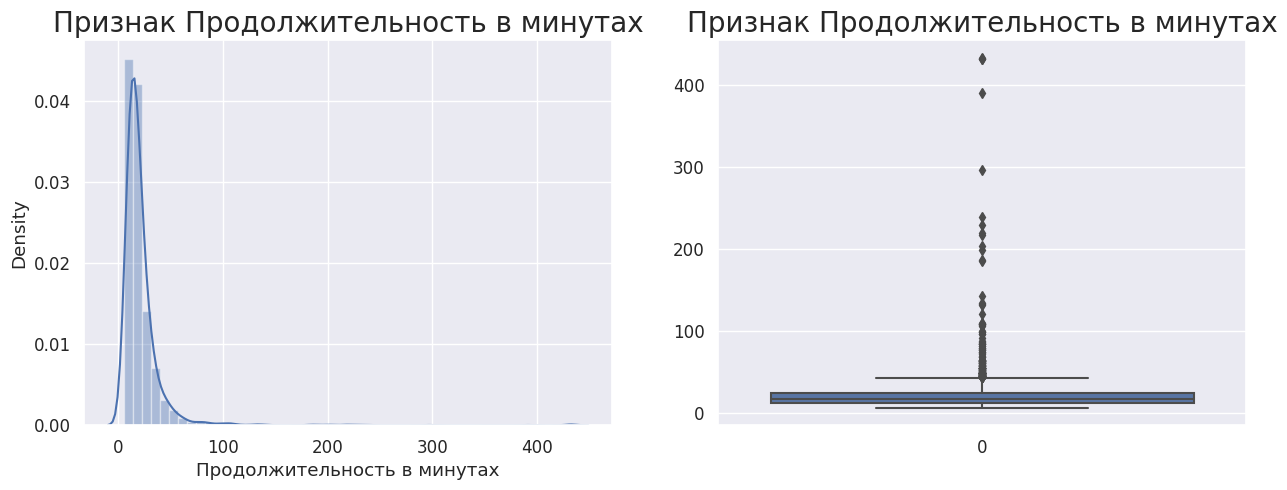

In [ ]:
df = dfsun_2022m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2022m,'Продолжительность в минутах')

In [ ]:
dfsun_2022m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,2373.000000,2373.000000,2373.000000,2.373000e+03,2373.000000
mean,2598.206911,2.777328,0.000002,4.856089e-06,21.850822
std,1101.214569,1.827853,0.000006,1.062094e-05,24.860498
min,0.000000,0.900000,0.000001,9.000000e-07,6.000000
25%,2974.000000,1.400000,0.000001,1.500000e-06,12.000000
50%,3055.000000,2.200000,0.000001,2.400000e-06,17.000000
75%,3110.000000,3.600000,0.000001,4.300000e-06,24.000000
max,3180.000000,9.900000,0.000100,2.200000e-04,433.000000


In [ ]:
dfsun_2023m = dfsun_2023.copy()
dfsun_2023m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2023m['Продолжительность вспышки'])
dfsun_2023m['Продолжительность в минутах'] = (dfsun_2023m['Продолжительность вспышки'].dt.hour*60)+dfsun_2023m['Продолжительность вспышки'].dt.minute+(dfsun_2023m['Продолжительность вспышки'].dt.second/60)
dfsun_2023m['Продолжительность в минутах'] = dfsun_2023m['Продолжительность в минутах'].astype('int')

dfsun_2023m.sort_values(by='Продолжительность вспышки', ascending=False).head(2)

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
642,Вспышка балла C3.7,3214,2023-02-14 08:08:00,2023-02-14 15:02:00,2023-02-14,2023-10-31 06:54:00,3.7,0.000001,0.000004,414
794,Вспышка балла C3.5,3276,2023-04-10 07:14:00,2023-04-10 12:37:00,2023-04-10,2023-10-31 05:23:00,3.5,0.000001,0.000003,323


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


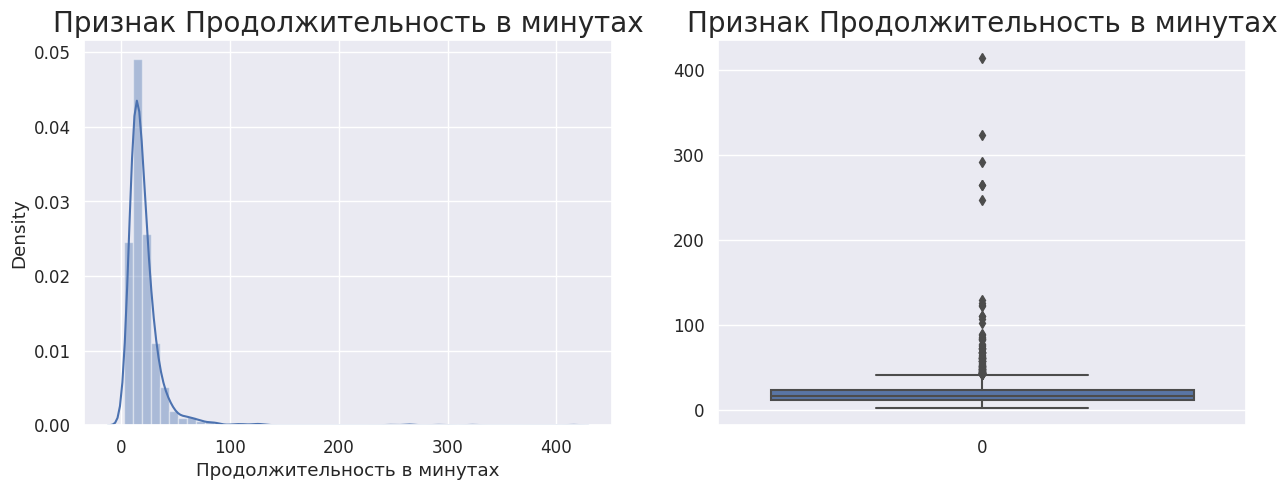

In [ ]:
df = dfsun_2023m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2023m,'Продолжительность в минутах')

In [ ]:
dfsun_2023m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,1604.000000,1604.000000,1604.000000,1.604000e+03,1604.000000
mean,2870.082918,3.449252,0.000003,6.726621e-06,21.445761
std,1066.081913,2.064314,0.000008,1.381025e-05,22.260331
min,0.000000,0.900000,0.000001,9.000000e-07,3.000000
25%,3192.000000,1.800000,0.000001,2.100000e-06,12.000000
50%,3256.000000,2.900000,0.000001,3.400000e-06,17.000000
75%,3305.000000,4.625000,0.000001,6.200000e-06,24.000000
max,3713.000000,9.900000,0.000100,2.200000e-04,414.000000


По признаку "Продолжительность в минутах" - во всех годах распределение скошено вправо. Стандартное квадратичное отклонение и среднее во всех годах, кроме 2021, близки. Значения в виде отдельных выбросов свыше 75%-го квартиля нарастают по годам.

Расмотрим данные в разрезе Класса вспышки. Необходимо выделить класс из столбца Балл вспышки, для анализа данных.

In [ ]:
dfsun_2019m['Класс'] = dfsun_2019m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2020m['Класс'] = dfsun_2020m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2021m['Класс'] = dfsun_2021m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2022m['Класс'] = dfsun_2022m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2023m['Класс'] = dfsun_2023m['Балл вспышки'].apply(lambda x : x[:15])

In [ ]:
dfsun_2019mpt = pd.pivot_table(dfsun_2019m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2019mpt = dfsun_2019mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2019mpt = dfsun_2019mpt.reset_index()
dfsun_2019mpt['год'] = 2019
dfsun_2019mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.000128,6,48,1005,2019


In [ ]:
dfsun_2020mpt = pd.pivot_table(dfsun_2020m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2020mpt = dfsun_2020mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2020mpt = dfsun_2020mpt.reset_index()
dfsun_2020mpt['год'] = 2020
dfsun_2020mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.00024,14,111,3001,2020
1,Вспышка балла M,0.00011,1,4,164,2020


In [ ]:
dfsun_2021mpt = pd.pivot_table(dfsun_2021m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2021mpt = dfsun_2021mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2021mpt = dfsun_2021mpt.reset_index()
dfsun_2021mpt['год'] = 2021
dfsun_2021mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.001173,51,489,11945,2021
1,Вспышка балла M,0.000516,15,30,1022,2021
2,Вспышка балла X,0.000250,2,2,47,2021


In [ ]:
dfsun_2022mpt = pd.pivot_table(dfsun_2022m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2022mpt = dfsun_2022mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2022mpt = dfsun_2022mpt.reset_index()
dfsun_2022mpt['год'] = 2022
dfsun_2022mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.006135,166,2175,46057,2022
1,Вспышка балла M,0.004458,51,191,5626,2022
2,Вспышка балла X,0.000930,6,7,169,2022


In [ ]:
dfsun_2023mpt = pd.pivot_table(dfsun_2023m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2023mpt = dfsun_2023mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2023mpt = dfsun_2023mpt.reset_index()
dfsun_2023mpt['год'] = 2023
dfsun_2023mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.005066,117,1399,28711,2023
1,Вспышка балла M,0.004543,51,197,5462,2023
2,Вспышка балла X,0.001180,8,8,226,2023


По сводным датасетам видно, что Вспышка класса X впервые появилась в 2021 году, их было всего 2, общей продолжительностью 47 минут. А позже, в 2022 и 2023 годах уже было 7 и 8 вспышек класса Х соответственно.

Что говорится в описании о таких вспышках:
"•	Солнечные вспышки X-класса - являются самыми большими и мощными. В среднем вспышки X-класса происходят примерно 10 раз в год и чаще встречаются при солнечном максимуме. Во время вспышки X-класса на дневной стороне Земли, уровень радиопомех сильный до экстремального (R3-R5). Если солнечная вспышка происходит вблизи центра обращенного к Земле солнечного диска, это может вызвать сильный и продолжительный шторм солнечной радиации и создать значительный выброс корональной массы который может привести к серьезным (G4) или экстремальным (G5) геомагнитным штормам на Земле."

Посмотрим, были ли магнитные бури в этот период.

In [ ]:
dfsun_2021m.query("Класс == 'Вспышка балла X'")

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах,Класс
112,Вспышка балла X1.5,2838,2021-07-03 17:18:00,2021-07-03 17:34:00,2021-07-03,2023-10-31 00:16:00,1.5,0.0001,0.00015,16,Вспышка балла X
284,Вспышка балла X1.0,2887,2021-10-28 18:17:00,2021-10-28 18:48:00,2021-10-28,2023-10-31 00:31:00,1.0,0.0001,0.00010,31,Вспышка балла X


In [ ]:
print(magnetic_storms_2021.query("Дата == '2021-07-03'"))
print(magnetic_storms_2021.query("Дата == '2021-10-28'"))

          Дата  Поток радиоизлучения (10.7 см)  \
183 2021-07-03                              95   

     Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
183                                 5                                  2   

    Усредненный планетарный A-индекс.1  
183             не было магнитных бурь  
          Дата  Поток радиоизлучения (10.7 см)  \
299 2021-10-28                             112   

     Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
299                                 5                                  2   

    Усредненный планетарный A-индекс.1  
299             не было магнитных бурь  


In [ ]:
dfsun_2022m.query("Класс == 'Вспышка балла X'")

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах,Класс
78,Вспышка балла X1.0,3110,2022-10-02 22:53:00,2022-10-02 23:34:00,2022-10-02,2023-10-31 00:41:00,1.0,0.0001,0.00010,41,Вспышка балла X
355,Вспышка балла X1.3,2975,2022-03-30 20:21:00,2022-03-30 20:46:00,2022-03-30,2023-10-31 00:25:00,1.3,0.0001,0.00013,25,Вспышка балла X
720,Вспышка балла X1.5,3006,2022-05-10 16:50:00,2022-05-10 16:59:00,2022-05-10,2023-10-31 00:09:00,1.5,0.0001,0.00015,9,Вспышка балла X
733,Вспышка балла X1.1,2994,2022-04-30 16:37:00,2022-04-30 16:52:00,2022-04-30,2023-10-31 00:15:00,1.1,0.0001,0.00011,15,Вспышка балла X
771,Вспышка балла X1.1,3004,2022-05-03 16:09:00,2022-05-03 16:31:00,2022-05-03,2023-10-31 00:22:00,1.1,0.0001,0.00011,22,Вспышка балла X
1721,Вспышка балла X2.2,2992,2022-04-20 06:41:00,2022-04-20 07:04:00,2022-04-20,2023-10-31 00:23:00,2.2,0.0001,0.00022,23,Вспышка балла X
1744,Вспышка балла X1.1,2994,2022-04-17 06:17:00,2022-04-17 06:51:00,2022-04-17,2023-10-31 00:34:00,1.1,0.0001,0.00011,34,Вспышка балла X


In [ ]:
print(magnetic_storms_2022.query("Дата == '2022-10-02	'"))
print(magnetic_storms_2022.query("Дата == '2022-03-30'"))
print(magnetic_storms_2022.query("Дата == '2022-05-10'"))
print(magnetic_storms_2022.query("Дата == '2022-04-30'"))
print(magnetic_storms_2022.query("Дата == '2022-05-03'"))
print(magnetic_storms_2022.query("Дата == '2022-04-20'"))
print(magnetic_storms_2022.query("Дата == '2022-04-17'"))

          Дата  Поток радиоизлучения (10.7 см)  \
233 2022-10-02                             154   

     Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
233                                12                                  3   

     Балл магнитного шторма  
233  не было магнитных бурь  
Empty DataFrame
Columns: [Дата, Поток радиоизлучения (10.7 см), Усредненный планетарный A-индекс, Усредненный планетарный Kp-индекс, Балл магнитного шторма]
Index: []
         Дата  Поток радиоизлучения (10.7 см)  \
91 2022-05-10                             117   

    Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
91                                 8                                  2   

    Балл магнитного шторма  
91  не было магнитных бурь  
         Дата  Поток радиоизлучения (10.7 см)  \
81 2022-04-30                             124   

    Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
81                                18 

In [ ]:
dfsun_2023m.query("Класс == 'Вспышка балла X'")

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах,Класс
41,Вспышка балла X2.2,3229,2023-02-17 22:38:00,2023-02-17 23:50:00,2023-02-17,2023-10-31 01:12:00,2.2,0.0001,0.00022,72,Вспышка балла X
168,Вспышка балла X1.9,3184,2023-01-09 21:37:00,2023-01-09 21:57:00,2023-01-09,2023-10-31 00:20:00,1.9,0.0001,0.00019,20,Вспышка балла X
225,Вспышка балла X2.1,3234,2023-03-03 20:42:00,2023-03-03 20:59:00,2023-03-03,2023-10-31 00:17:00,2.1,0.0001,0.00021,17,Вспышка балла X
260,Вспышка балла X1.1,3341,2023-06-20 19:42:00,2023-06-20 20:26:00,2023-06-20,2023-10-31 00:44:00,1.1,0.0001,0.00011,44,Вспышка балла X
369,Вспышка балла X1.1,3217,2023-02-11 18:40:00,2023-02-11 18:54:00,2023-02-11,2023-10-31 00:14:00,1.1,0.0001,0.00011,14,Вспышка балла X
1259,Вспышка балла X1.2,3256,2023-03-29 05:18:00,2023-03-29 05:40:00,2023-03-29,2023-10-31 00:22:00,1.2,0.0001,0.00012,22,Вспышка балла X
1362,Вспышка балла X1.2,3182,2023-01-06 03:43:00,2023-01-06 04:07:00,2023-01-06,2023-10-31 00:24:00,1.2,0.0001,0.00012,24,Вспышка балла X
1501,Вспышка балла X1.0,3186,2023-01-11 01:39:00,2023-01-11 01:52:00,2023-01-11,2023-10-31 00:13:00,1.0,0.0001,0.00010,13,Вспышка балла X


In [ ]:
print(magnetic_storms_2023.query("Дата == '2023-02-17'"))
print(magnetic_storms_2023.query("Дата == '2023-01-09'"))
print(magnetic_storms_2023.query("Дата == '2023-03-03'"))
print(magnetic_storms_2023.query("Дата == '2023-06-20'"))
print(magnetic_storms_2023.query("Дата == '2023-02-11'"))
print(magnetic_storms_2023.query("Дата == '2023-03-29'"))
print(magnetic_storms_2023.query("Дата == '2023-01-06'"))
print(magnetic_storms_2023.query("Дата == '2023-01-11'"))

         Дата  Поток радиоизлучения (10.7 см)  \
47 2023-02-17                             343   

    Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
47                                24                                  3   

    Балл магнитного шторма  
47  не было магнитных бурь  
        Дата  Поток радиоизлучения (10.7 см)  \
8 2023-01-09                             191   

   Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
8                                 8                                  2   

   Балл магнитного шторма  
8  не было магнитных бурь  
         Дата  Поток радиоизлучения (10.7 см)  \
61 2023-03-03                             175   

    Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
61                                21                                  4   

    Балл магнитного шторма  
61  не было магнитных бурь  
          Дата  Поток радиоизлучения (10.7 см)  \
170 2023-06-20                  

Только один раз проявилась магнитная буря, в 2022 году, в один день и то слабая - уровня G1.

Анализ в разрезе Активных областей.

Сформируем обощённый датасет по годам.

In [ ]:
dfsun_2019mo = pd.pivot_table(dfsun_2019mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2019mo = dfsun_2019mo.reset_index()

dfsun_2020mo = pd.pivot_table(dfsun_2020mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2020mo = dfsun_2020mo.reset_index()

dfsun_2021mo = pd.pivot_table(dfsun_2021mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2021mo = dfsun_2021mo.reset_index()

dfsun_2022mo = pd.pivot_table(dfsun_2022mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2022mo = dfsun_2022mo.reset_index()

dfsun_2023mo = pd.pivot_table(dfsun_2023mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2023mo = dfsun_2023mo.reset_index()

dfsun = pd.concat([dfsun_2019mo, dfsun_2020mo, dfsun_2021mo, dfsun_2022mo, dfsun_2023mo], axis=0)
dfsun

,год,E,Активная область,Кол-во вспышек,Продолжительность в минутах
0,2019,0.000128,6,48,1005
0,2020,0.000350,15,115,3165
0,2021,0.001939,68,521,13014
0,2022,0.011523,223,2373,51852
0,2023,0.010790,176,1604,34399


По обобщённому датасету видно увеличение Значения Е, количества активных областей, вспышек и продолжительност в минутах. Наглядно покажут гистограммы по каждому признаку.

<Axes: xlabel='год'>

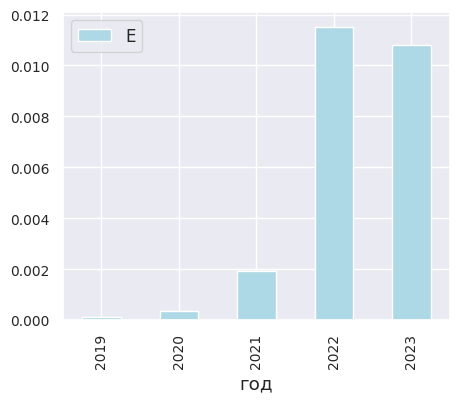

In [ ]:
dfsun.plot(x = 'год',
            y=['E'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(5, 4),
            fontsize=10)

<Axes: xlabel='год'>

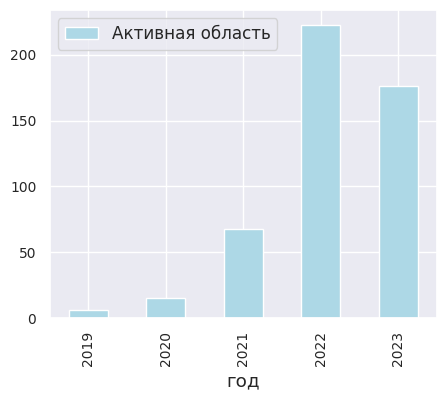

In [ ]:
dfsun.plot(x = 'год',
            y=['Активная область'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(5, 4),
            fontsize=10)

<Axes: xlabel='год'>

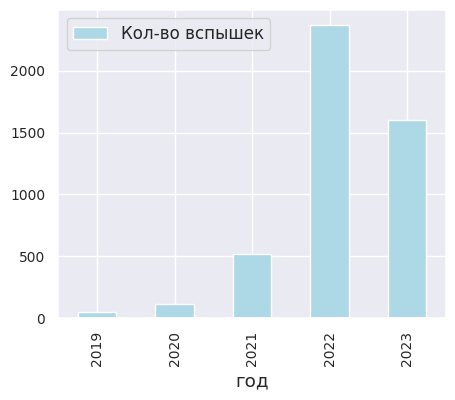

In [ ]:
dfsun.plot(x = 'год',
            y=['Кол-во вспышек'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(5, 4),
            fontsize=10)

<Axes: xlabel='год'>

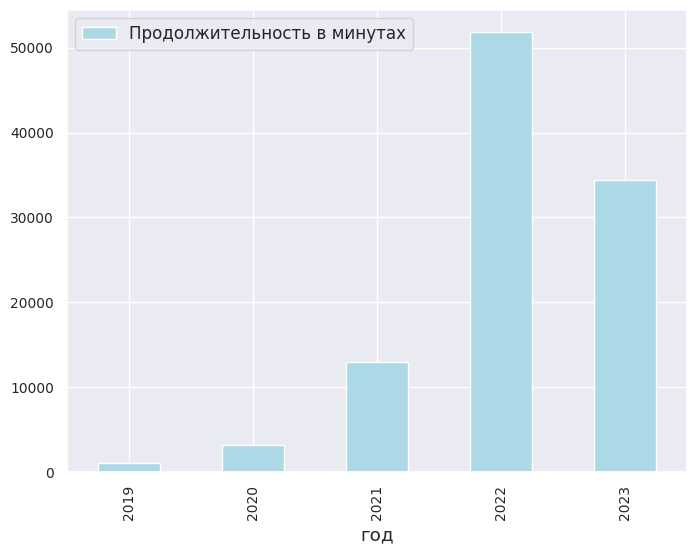

In [ ]:
dfsun.plot(x = 'год',
            y=['Продолжительность в минутах'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(8, 6),
            fontsize=10)

По всем признакам виден плавный рост по годам.

Построим матрицу корреляции Пирсона и попробуем найти взаимосвязи.

Коэффициент корреляции Пирсона является мерой линейной связи между двумя переменными X и Y. Он имеет значение от -1 до 1, где:

* -1/+1 указывает на линейную корреляцию между двумя переменными,
* 0 указывает на отсутствие линейной корреляции между двумя переменными.

По сути интересует приближение к 1. Чем ближе к единице, тем больше выражена линейная корреляция, а значит и присутствует связь между двумя переменными.

In [ ]:
dfsun_2019.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-25-b76f9bd3b1ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_2019.corr().style.background_gradient(cmap='RdYlGn')
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Активная область,Балл,Класс вспышки,E
Активная область,1.000000,0.060359,nan,0.060359
Балл,0.060359,1.000000,nan,1.000000
Класс вспышки,nan,nan,nan,nan
E,0.060359,1.000000,nan,1.000000


In [ ]:
dfsun_2020.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-26-6a0d3677b57a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_2020.corr().style.background_gradient(cmap='RdYlGn')


,Активная область,Балл,Класс вспышки,E
Активная область,1.000000,-0.152781,-0.455777,-0.399899
Балл,-0.152781,1.000000,0.064865,0.425285
Класс вспышки,-0.455777,0.064865,1.000000,0.800042
E,-0.399899,0.425285,0.800042,1.000000


In [ ]:
dfsun_2021.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-27-072f49535923>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_2021.corr().style.background_gradient(cmap='RdYlGn')


,Активная область,Балл,Класс вспышки,E
Активная область,1.000000,0.052854,0.036055,0.051432
Балл,0.052854,1.000000,-0.067734,0.147578
Класс вспышки,0.036055,-0.067734,1.000000,0.934485
E,0.051432,0.147578,0.934485,1.000000


In [ ]:
dfsun_2022.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-28-2edca364cd66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_2022.corr().style.background_gradient(cmap='RdYlGn')


,Активная область,Балл,Класс вспышки,E
Активная область,1.000000,0.069850,0.036941,0.056978
Балл,0.069850,1.000000,-0.069435,0.225630
Класс вспышки,0.036941,-0.069435,1.000000,0.815223
E,0.056978,0.225630,0.815223,1.000000


In [ ]:
dfsun_2023.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-29-18d88ed8609b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_2023.corr().style.background_gradient(cmap='RdYlGn')


,Активная область,Балл,Класс вспышки,E
Активная область,1.000000,0.055767,0.068491,0.077072
Балл,0.055767,1.000000,-0.144593,0.114107
Класс вспышки,0.068491,-0.144593,1.000000,0.845489
E,0.077072,0.114107,0.845489,1.000000


Во всех годах видна корреляция между Классом вспышки и Значением Энергии. Это логично, поскольку выход Энергии напрямую связан с классом вспышки - чем больше значение Энергии, тем выше класс вспышки. Других взаимосвязей не обнаружено. Посмотрим, где больше всего возникает вспышек.

In [ ]:
pd.pivot_table(dfsun_2019, index='Активная область', values='E', aggfunc='count').sort_values(by='E', ascending=False).head()

,E
Активная область,
2736,18
2740,15
2733,9
2732,2
2734,2
2741,2


In [ ]:
pd.pivot_table(dfsun_2020, index='Активная область', values='E', aggfunc='count').sort_values(by='E', ascending=False).head()


,E
Активная область,
2781,25
2786,18
0,17
2779,14
2790,8


In [ ]:
pd.pivot_table(dfsun_2021, index='Активная область', values='E', aggfunc='count').sort_values(by='E', ascending=False).head()

,E
Активная область,
2907,61
0,51
2824,33
2891,33
2887,30


In [ ]:
pd.pivot_table(dfsun_2022, index='Активная область', values='E', aggfunc='count').sort_values(by='E', ascending=False).head()

,E
Активная область,
0,360
3112,76
3089,76
3078,67
3169,59


In [ ]:
pd.pivot_table(dfsun_2023, index='Активная область', values='E', aggfunc='count').sort_values(by='E', ascending=False).head()

,E
Активная область,
0,194
3311,80
3272,57
3288,56
3234,55


Активная область 0 показалсь в первой пятерке в 2020-2023 годах. Возможно она больше всего предрасположена для возникновения вспышек. Посмотри на максимальные значения продолжительности в минутах по активным областям.

In [ ]:
pd.pivot_table(dfsun_2019m, index='Активная область', values='Продолжительность в минутах', aggfunc='max').sort_values(by='Продолжительность в минутах', ascending=False).head()

,Продолжительность в минутах
Активная область,
2740,67
2736,59
2734,51
2733,30
2732,29


In [ ]:
pd.pivot_table(dfsun_2020m, index='Активная область', values='Продолжительность в минутах', aggfunc='max').sort_values(by='Продолжительность в минутах', ascending=False).head()

,Продолжительность в минутах
Активная область,
0,273
2790,107
2785,83
2782,62
2786,58


In [ ]:
pd.pivot_table(dfsun_2021m, index='Активная область', values='Продолжительность в минутах', aggfunc='max').sort_values(by='Продолжительность в минутах', ascending=False).head()

,Продолжительность в минутах
Активная область,
2871,960
2824,413
2891,150
2868,85
2887,76


In [ ]:
pd.pivot_table(dfsun_2022m, index='Активная область', values='Продолжительность в минутах', aggfunc='max').sort_values(by='Продолжительность в минутах', ascending=False).head()

,Продолжительность в минутах
Активная область,
2996,433
0,432
2993,390
3032,239
2965,229


In [ ]:
pd.pivot_table(dfsun_2023m, index='Активная область', values='Продолжительность в минутах', aggfunc='max').sort_values(by='Продолжительность в минутах', ascending=False).head()

,Продолжительность в минутах
Активная область,
3214,414
3276,323
0,291
3229,264
3258,247


Активная область 0 повторилась в первой пятёрке в 2020, 2022 и 2023 годах. Других областей не обнаружено.

In [ ]:
dfsun_act20.sort_values(by='Активная область', ascending=True).head()

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
0,Вспышка балла C,2.6,0,2020-11-26 22:20:00,2020-11-27 02:53:00,2020-11-26,0.000003,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Вспышка балла C,1.0,0,2020-05-29 17:18:00,2020-05-29 17:27:00,2020-05-29,0.000001,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Вспышка балла C,1.0,0,2020-05-30 17:18:00,2020-05-30 17:27:00,2020-05-30,0.000001,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Вспышка балла C,2.0,0,2020-11-06 04:00:00,2020-11-06 04:08:00,2020-11-06,0.000002,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Вспышка балла C,1.8,0,2020-11-05 03:53:00,2020-11-05 04:00:00,2020-11-05,0.000002,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act22.sort_values(by='Активная область', ascending=True).head()

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
203,Вспышка балла C,2.4,0,2022-02-01 13:14:00,2022-02-01 13:33:00,2022-02-01,0.000002,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Вспышка балла C,3.0,0,2022-09-12 09:00:00,2022-09-12 09:17:00,2022-09-12,0.000003,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Вспышка балла C,2.5,0,2022-10-21 09:01:00,2022-10-21 09:26:00,2022-10-21,0.000003,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,Вспышка балла C,1.2,0,2022-12-09 09:14:00,2022-12-09 09:28:00,2022-12-09,0.000001,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,Вспышка балла C,1.6,0,2022-12-11 09:12:00,2022-12-11 09:34:00,2022-12-11,0.000002,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act23.sort_values(by='Активная область', ascending=True).head()

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
0,Вспышка балла M,1.9,0,2023-05-22 16:30:00,2023-05-22 20:55:00,2023-05-22,0.000019,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,Вспышка балла C,2.4,0,2023-02-28 07:50:00,2023-02-28 08:26:00,2023-02-28,0.000002,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,Вспышка балла C,2.0,0,2023-02-15 20:31:00,2023-02-15 20:42:00,2023-02-15,0.000002,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,Вспышка балла C,1.4,0,2023-04-11 08:17:00,2023-04-11 08:31:00,2023-04-11,0.000001,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,Вспышка балла C,3.3,0,2023-01-17 08:15:00,2023-01-17 08:34:00,2023-01-17,0.000003,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Действительно, в Активной области 0 продолжительность в минутах дростаточно большая, а значения выхода Энергии - малы. К сожалению нет магнитных характеристик, чтобы сложилось представление о свойствах группы активных пятен.

Выводы по анализу солнечных вспышек.

Во всех годах признак "Е" имеет правостороннеее распределение (то есть, распределение гистограммы скошено вправо - среднне значение больше медианы). Значения в данном признаке совсем маленькие, большая часть значений скопились около 0. Это видно и по блочной диаграмме. Есть много выбросов свыше 3 квартиля - 75%-го процентиля, то есть одиночные большие значения.

В сравненнии признака выброса Энергии по годам, виден явный рост с 2019 года по настоящее время. Даже половина 2023 года уже почти догнало 2022 год.

Также и по признаку "Продолжительность в минутах" распределение скошено вправо, присутствуют отдельные пики в правой части, о чём и свидетельствуют выбросы в 3 квартиле блочной диаграммы.

Общая картина по всем признакам: явный рост значений с годами. Как и продолжительности в минутах, так и по кол-ву активных групп, значений энергии, и кол-ву вспышек.

Активная область 0 проявила себя в нескольких годах, как по числу пятен, так и по продолжительности минут. Однако в отсутствие магнитных характеристик по данной активной области, невозможно понять данную взаимосвязь.

Проанализировали вспышки класса Х, которые могут быть предвестниками магнитной бури. Однако в тех датах, когда произошли вспышки была лишь одна слабая магнитная буря G1. Скорее всего это связано с тем, что солнечные вспышки произошли не вблизи центра обращенного к Земле солнечного диска.

#### Анализ активных пятен

Построим распределения по признаку Число пятен в группе

<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


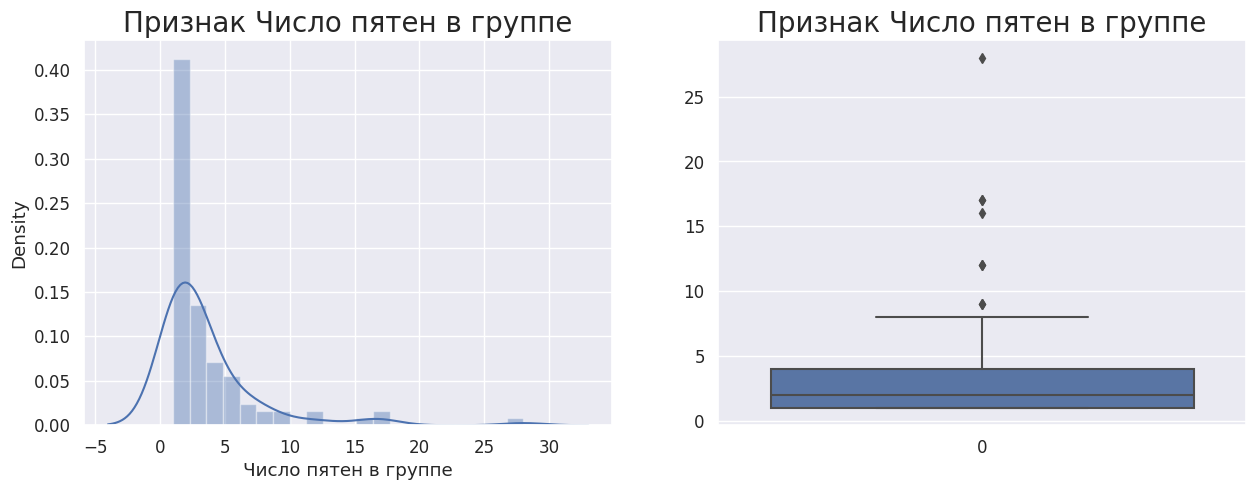

In [ ]:
df = dfact_2019
title = 'Число пятен в группе'

dist_and_box(dfact_2019,'Число пятен в группе')

In [ ]:
dfact_2019.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,98.000000,98.000000,98.000000,98.000000
mean,3.622449,101.734694,4.102041,223.122449
std,4.177789,112.213213,4.021821,84.816511
min,1.000000,0.000000,0.000000,59.000000
25%,1.000000,10.000000,2.000000,157.500000
50%,2.000000,45.000000,3.000000,260.000000
75%,4.000000,160.000000,5.000000,294.000000
max,28.000000,420.000000,33.000000,309.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


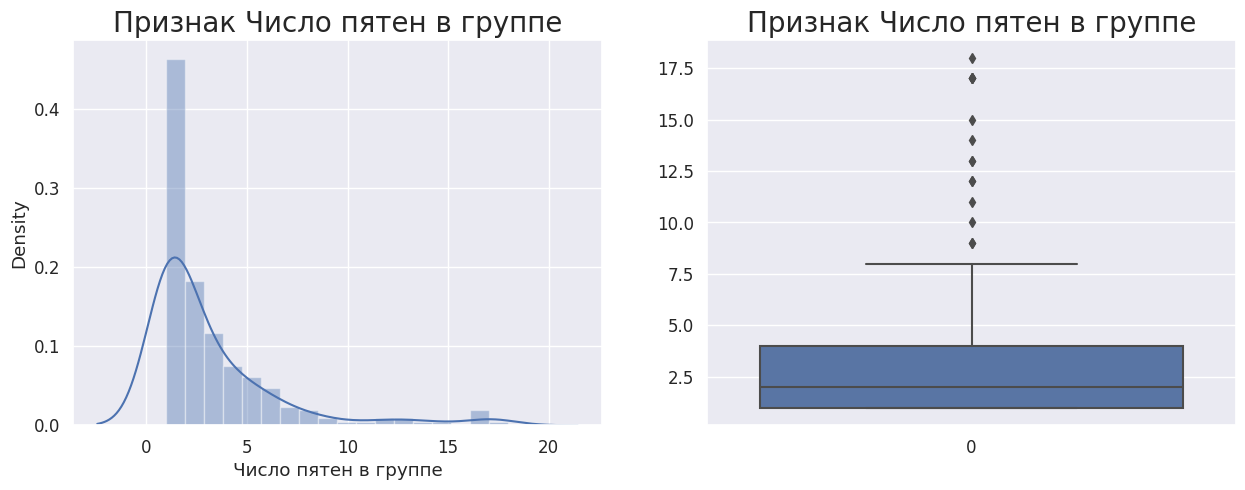

In [ ]:
df = dfact_2020
title = 'Число пятен в группе'

dist_and_box(dfact_2020,'Число пятен в группе')

In [ ]:
dfact_2020.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,226.000000,226.000000,226.000000,226.000000
mean,3.150442,98.584071,4.230088,192.973451
std,3.392072,147.885795,4.078145,112.382083
min,1.000000,0.000000,0.000000,2.000000
25%,1.000000,10.000000,1.250000,87.000000
50%,2.000000,60.000000,3.000000,199.000000
75%,4.000000,110.000000,5.000000,298.500000
max,18.000000,1000.000000,20.000000,359.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


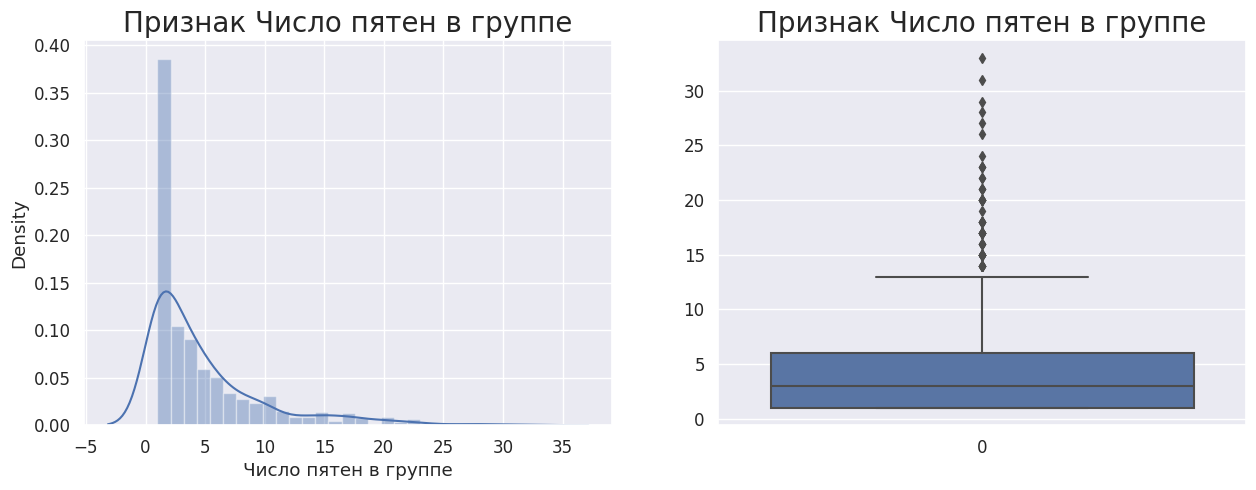

In [ ]:
df = dfact_2021
title = 'Число пятен в группе'

dist_and_box(dfact_2021,'Число пятен в группе')

In [ ]:
dfact_2021.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,730.00000,730.000000,730.000000,730.000000
mean,4.90000,89.184932,4.300000,203.243836
std,5.18197,107.147131,3.168626,104.145096
min,1.00000,0.000000,0.000000,1.000000
25%,1.00000,10.000000,2.000000,141.250000
50%,3.00000,40.000000,4.000000,212.000000
75%,6.00000,120.000000,6.000000,286.750000
max,33.00000,770.000000,14.000000,359.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


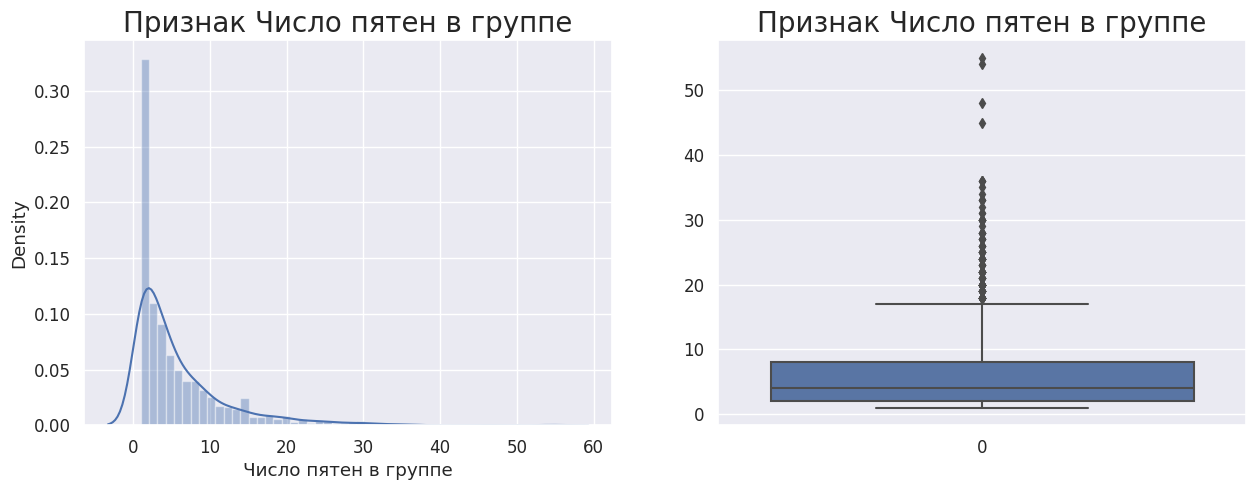

In [ ]:
df = dfact_2022
title = 'Число пятен в группе'

dist_and_box(dfact_2022,'Число пятен в группе')

In [ ]:
dfact_2022.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,1785.000000,1785.000000,1785.000000,1785.000000
mean,5.949020,125.746218,5.627451,164.261064
std,6.399637,161.398228,4.194624,109.096818
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,20.000000,2.000000,74.000000
50%,4.000000,70.000000,5.000000,140.000000
75%,8.000000,150.000000,8.000000,260.000000
max,55.000000,1190.000000,26.000000,360.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


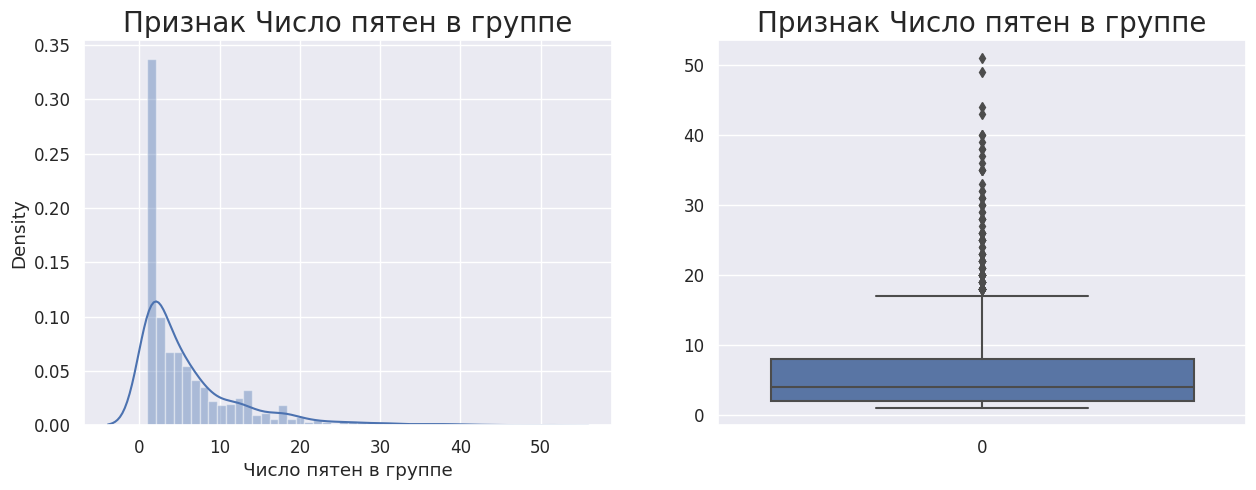

In [ ]:
df = dfact_2023
title = 'Число пятен в группе'

dist_and_box(dfact_2023,'Число пятен в группе')

In [ ]:
dfact_2023.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,6.308036,121.164435,5.574405,176.718006
std,6.915966,150.329503,4.152936,100.969943
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,20.000000,2.000000,104.000000
50%,4.000000,60.000000,5.000000,170.000000
75%,8.000000,160.000000,8.000000,263.000000
max,51.000000,950.000000,19.000000,359.000000


Распределение по признаку "Число пятен в группе" скошено вправо, СКО от среднего далеки. Разброс значений очевиден по блочной диаграмме - присутствуют выбросы свыше 3 квартиля. Всё также как и в предъидущем датасете значения нарастают по годам.

Сравнение по годам.

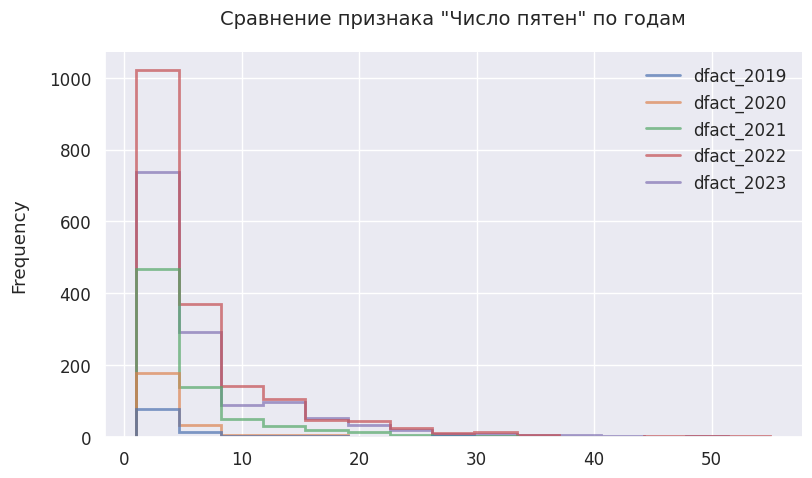

In [ ]:
from matplotlib.lines import Line2D


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist([dfact_2019['Число пятен в группе'], dfact_2020['Число пятен в группе'],
         dfact_2021['Число пятен в группе'], dfact_2022['Число пятен в группе'],
         dfact_2023['Число пятен в группе']], bins=15, histtype='step', linewidth=2,
        alpha=0.7, label=['dfact_2019','dfact_2020', 'dfact_2021', 'dfact_2022', 'dfact_2023'])

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Frequency', labelpad=15)
plt.title('Сравнение признака "Число пятен" по годам', fontsize=14, pad=20)
plt.show()

Сравнение значений признака "Число пятен в группе" по годам, говорит о явном росте с 2019 года по настоящее время. Значения 2023 года имеют тенденцию к опережению показателей 2022 года.

Построим матрицу корреляции Пирсона и попробуем найти взаимосвязи по данному датасету.

Коэффициент корреляции Пирсона является мерой линейной связи между двумя переменными X и Y. Он имеет значение от -1 до 1, где:

* -1 указывает на совершенно отрицательную линейную корреляцию между двумя переменными,
* 0 указывает на отсутствие линейной корреляции между двумя переменными,
* 1 указывает на совершенно положительную линейную корреляцию между двумя переменными.

По сути интересует приближение к 1. Чем ближе к единице, тем больше выражена линейная корреляция, а значит и присутствует связь между двумя переменными.

In [ ]:
dfact_2019.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-35-1bec12db0401>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2019.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.124779,0.491940,0.108885
Площадь (в миллионных долях солнечной полусферы),0.124779,1.000000,0.116562,0.629050
Протяженность группы (в градусах),0.491940,0.116562,1.000000,0.022539
Кэррингтоновская долгота группы (в градусах дуги),0.108885,0.629050,0.022539,1.000000


In [ ]:
dfact_2020.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-37-7c3c00cb235e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2020.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.590403,0.757003,0.181807
Площадь (в миллионных долях солнечной полусферы),0.590403,1.000000,0.640385,0.304216
Протяженность группы (в градусах),0.757003,0.640385,1.000000,0.201488
Кэррингтоновская долгота группы (в градусах дуги),0.181807,0.304216,0.201488,1.000000


In [ ]:
dfact_2021.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-36-ecc45649de7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2021.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.706078,0.738756,-0.037771
Площадь (в миллионных долях солнечной полусферы),0.706078,1.000000,0.603989,0.007335
Протяженность группы (в градусах),0.738756,0.603989,1.000000,-0.028991
Кэррингтоновская долгота группы (в градусах дуги),-0.037771,0.007335,-0.028991,1.000000


In [ ]:
dfact_2022.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-38-f9ac85157977>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2022.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.627837,0.751769,-0.048763
Площадь (в миллионных долях солнечной полусферы),0.627837,1.000000,0.670365,-0.018748
Протяженность группы (в градусах),0.751769,0.670365,1.000000,-0.017002
Кэррингтоновская долгота группы (в градусах дуги),-0.048763,-0.018748,-0.017002,1.000000


In [ ]:
dfact_2023.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-39-c8970ddf3db6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2023.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.683908,0.771658,0.000279
Площадь (в миллионных долях солнечной полусферы),0.683908,1.000000,0.676460,0.024372
Протяженность группы (в градусах),0.771658,0.676460,1.000000,-0.049550
Кэррингтоновская долгота группы (в градусах дуги),0.000279,0.024372,-0.049550,1.000000


По всем годам, можно сделать общий вывод: есть корреляция у значений Число пятен, протяжённсть, площадь. В 2019 и 2020 году, в корреляции присутствуют значения Кэррингтоновской долготы и площади, но в последующие года - коэффициент корреляции отсутствует. Возможно, именно в 2019 и 2020 годах на определённом градусе долготывозникали активные пятна определённой площади. Это можно будет проверить.

Предварительный вывод: площадь и протяжённость зависит от числа пятен в тот или иной день.

In [ ]:
dfact_2019.sort_values(by='Число пятен в группе', ascending=False).head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
28,№ 2736,N09 W48,28,Dac,210,9,283,Beta-Gamma-Delta,2019-03-22
29,№ 2736,N08 W62,17,Eki,420,11,284,Beta-Gamma,2019-03-23
9,№ 2733,N06 W20,17,Dri,50,9,259,Beta,2019-01-26
10,№ 2733,N06 W34,16,Dsi,80,10,260,Beta,2019-01-27
30,№ 2736,N08 W77,12,Eki,280,12,285,Beta,2019-03-24


Предварительный вывод не совсем правильный, поскольку на отсортированном датасете видно, что площадь может быть больше у числа пятен, многим меньше, чем максимальное значение. Продолжим дальше искать взимосвязи, посмотрим влияет ли магнитный тип группы и классификация группы по модифицированной ситеме Цюрриха.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2019, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Gamma-Delta                        28
Beta                                    17
Beta-Gamma                              17
Beta-Delta                               4
Alpha                                    3
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Dac                                                                   28
Dri                                                                   17
Eki                                                                   17
Dsi                                                                   16
Dso                                                                   12


In [ ]:
print(pd.pivot_table(dfact_2020, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2020, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta                                    18
Beta-Gamma                              17
Alpha                                    6
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Ehi                                                                   18
Eso                                                                   17
Esi                                                                   17
Cki                                                                   17
Fko                                                                   17


In [ ]:
print(pd.pivot_table(dfact_2021, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2021, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Delta                              33
Beta                                    29
Beta-Gamma                              28
Beta-Gamma-Delta                        21
Alpha                                    4
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Dkc                                                                   33
Eki                                                                   27
Dhi                                                                   26
Dki                                                                   24
Ekc                                                                   23


In [ ]:
print(pd.pivot_table(dfact_2022, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2022, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Gamma-Delta                        55
Beta                                    45
Beta-Delta                              36
Beta-Gamma                              35
Alpha                                    8
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Fkc                                                                   55
Fso                                                                   45
Ekc                                                                   36
Fki                                                                   34
Ehc                                                                   33


In [ ]:
print(pd.pivot_table(dfact_2023, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2023, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Gamma-Delta                        51
Beta-Gamma                              49
Gamma                                   31
Beta-Delta                              27
Beta                                    23
Alpha                                   14
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Fkc                                                                   51
Ehi                                                                   49
Ekc                                                                   44
Fai                                                                   43
Eai                                                                   39


Классификация по системе Цюриха не влияет на число пятен, а скорее просто описывает характер пятен и их физические и магнитные свойства. А вот магнитный тип возможно имеет сязь с числом пятен. Максимальные значения пятен за тот или иной день возникают в магнитных типах группы Beta, Beta-Gamma-Delta и Beta-Gamma. Посмотрим на частоту пятен в магнитных группах.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2020, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2021, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2022, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2023, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))

                      Число пятен в группе
Магнитный тип группы                      
Alpha                                   50
Beta                                    44
Beta-Delta                               2
Beta-Gamma                               1
Beta-Gamma-Delta                         1
                      Число пятен в группе
Магнитный тип группы                      
Alpha                                  119
Beta                                    99
Beta-Gamma                               8
                      Число пятен в группе
Магнитный тип группы                      
Beta                                   383
Alpha                                  288
Beta-Gamma                              47
Beta-Delta                               8
Beta-Gamma-Delta                         4
                      Число пятен в группе
Магнитный тип группы                      
Beta                                  1050
Alpha                                  575
Beta-Gamma 

Чаще всего тёмные пятна возникают в магнитных типах Альфа и Бэтта.

•	α – Alpha: Однополярная группа солнечных пятен.

•	β – Бета: Группа солнечных пятен, которая имеет положительную и отрицательную полярность (биполярная) с простым делением между полярностями.


Посмотрим, есть ли связь межу классификацией по Цюриху и протяжённостью, площадью. Выведем максимальные значения Протяжённости группы (в градусах) по группам модифицированной системы Цюриха по годам, в сводную таблицу.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)').sort_values(by='Протяженность группы (в градусах)', ascending=False))
print(pd.pivot_table(dfact_2020, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)').sort_values(by='Протяженность группы (в градусах)', ascending=False))
print(pd.pivot_table(dfact_2021, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)').sort_values(by='Протяженность группы (в градусах)', ascending=False))
print(pd.pivot_table(dfact_2022, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)').sort_values(by='Протяженность группы (в градусах)', ascending=False))
print(pd.pivot_table(dfact_2023, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)').sort_values(by='Протяженность группы (в градусах)', ascending=False))

                                                    Протяженность группы (в градусах)
Классификация группы по модифицированной систем...                                   
Bxo                                                                                33
Eki                                                                                12
Dso                                                                                10
Dsi                                                                                10
Cso                                                                                10
Dac                                                                                 9
Dri                                                                                 9
Cao                                                                                 9
Dro                                                                                 8
Hhx                                                   

Также выведем и значения площади по группам модифицированной системы Цюриха в сводную таблицу.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False))
print(pd.pivot_table(dfact_2020, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False))
print(pd.pivot_table(dfact_2021, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False))
print(pd.pivot_table(dfact_2022, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False))
print(pd.pivot_table(dfact_2023, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False))

                                                    Площадь (в миллионных долях солнечной полусферы)
Классификация группы по модифицированной систем...                                                  
Eki                                                                                              420
Hhx                                                                                              400
Cho                                                                                              350
Hsx                                                                                              300
Dho                                                                                              280
Cso                                                                                              240
Dac                                                                                              210
Cao                                                                                        

Да, видно как цифры распределились по группам. В каждом году максимальные цифры не повторяются по классификационным группам, а распределяются.

Если проанализировать первые пять максимальных значений по каждому году и по каждому признаку, то можно сделать следующие выводы:
* в протяжённости повторяются Классификация группы - Fki, Eki, Fkc, Fai.
* площади - Eki, Cko, Fko, Ekc, Dkc.

Что можно понять из описания к этим группам:

Первая буква F, говорит о большой и сложной системе солнечных пятен, способных производить крупные вспышки Х-класса и М-класса. Вторые буквы говорят о типе полутени самого крупного пятна в группе - здесь к-крупный ассиметричный или а-небольшая асимметричность. Третьи буквы - i,c,o-говорят о компактности пятен-умеренная компактность, очень плотные и сложные, открытая группа. Остальные группы пятен - одиночные, небольшие, маленькая группа средних пятен, не представляющие интерес, поскольку не порождают крупные вспышки. Получается группа начинающаяся с буквы F - самая интересная для анализа, поскольку в этой группе могут порождаться крупные вспышки.

Посмотрим Какие группы покажутся, если вывести максимальные значения по столбцам Площадь (в миллионных долях солнечной полусферы) и Протяженность группы (в градусах).

In [ ]:
dfact_2019.sort_values(['Площадь (в миллионных долях солнечной полусферы)', 'Протяженность группы (в градусах)'], ascending=False).head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
29,№ 2736,N08 W62,17,Eki,420,11,284,Beta-Gamma,2019-03-23
46,№ 2738,N06 W62,1,Hhx,400,3,301,Alpha,2019-04-18
39,№ 2738,N06 E33,3,Cho,350,4,298,Beta,2019-04-11
45,№ 2738,N06 W48,1,Hhx,330,3,300,Alpha,2019-04-17
41,№ 2738,N06 E07,4,Cho,300,5,297,Beta,2019-04-13


In [ ]:
dfact_2020.sort_values(['Площадь (в миллионных долях солнечной полусферы)', 'Протяженность группы (в градусах)'], ascending=False).head()

,Дата,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
166,2020-11-26,№ 2786,S17 E53,6,Cko,1000,11,343,Beta
167,2020-11-27,№ 2786,S17 E41,9,Fko,840,19,340,Beta-Gamma
168,2020-11-28,№ 2786,S18 E29,14,Fko,800,18,339,Beta-Gamma
169,2020-11-29,№ 2786,S18 E15,17,Fko,780,18,340,Beta-Gamma
170,2020-11-30,№ 2786,S17 E03,13,Fki,770,18,339,Beta-Gamma


In [ ]:
dfact_2021.sort_values(['Площадь (в миллионных долях солнечной полусферы)', 'Протяженность группы (в градусах)'], ascending=False).head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
231,№ 2835,S18 W16,20,Ekc,770,11,53,Beta-Gamma,2021-07-02
725,№ 2916,S16 W36,14,Esi,640,12,192,Beta-Gamma,2021-12-31
237,№ 2835,S18 W43,33,Dkc,620,10,55,Beta-Delta,2021-07-04
234,№ 2835,S18 W29,31,Dkc,560,9,54,Beta-Delta,2021-07-03
241,№ 2835,S18 W56,17,Dkc,540,8,54,Beta,2021-07-05


In [ ]:
dfact_2022.sort_values(['Площадь (в миллионных долях солнечной полусферы)', 'Протяженность группы (в градусах)'], ascending=False).head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
628,№ 3014,N24 W09,12,Dkc,1190,10,105,Beta-Gamma-Delta,2022-05-21
620,№ 3014,N22 E04,30,Ekc,1100,11,106,Beta-Gamma-Delta,2022-05-20
1597,№ 3153,S17 E33,13,Fko,1080,16,327,Beta,2022-12-05
890,№ 3055,S16 E05,25,Ekc,960,12,122,Beta,2022-07-12
635,№ 3014,N22 W24,14,Ekc,940,11,107,Beta-Gamma-Delta,2022-05-22


In [ ]:
dfact_2023.sort_values(['Площадь (в миллионных долях солнечной полусферы)', 'Протяженность группы (в градусах)'], ascending=False).head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
52,№ 3182,S17 E20,30,Ekc,950,15,226,Beta-Gamma-Delta,2023-01-10
126,№ 3190,S15 E09,17,Eki,950,12,119,Beta-Gamma,2023-01-19
117,№ 3190,S14 E20,20,Eki,900,14,121,Beta-Gamma,2023-01-18
1342,№ 3354,N15 W16,40,Ekc,890,13,166,Beta-Gamma-Delta,2023-06-30
47,№ 3182,S17 E32,23,Eki,880,15,228,Beta-Gamma-Delta,2023-01-09


Чаще всего в первых пятёрках по каждому году встречается FKO, Ekc, Dkc. Группы, начинающиеся с первых букв A,B,C,D,E - не представляют особого интереса, так как они способны вызывать небольшие вспышки. А вот интересны группы, начинающиеся с F, H. F уже была описана: "Эти регионы часто способны производить крупные вспышки X-класса, а также многочисленные крупные вспышки M-класса и множество C-класса". При чём магнитный тип группы у таких групп по модифицированной системе Цюриха следующего описания:

•	β – Бета: Группа солнечных пятен, которая имеет положительную и отрицательную полярность (биполярная) с простым делением между полярностями.

•	β-γ – Бета-Гамма: Биполярная группа солнечных пятен, но достаточно сложная, так что ни одна силовая линия магнитного поля не может быть проведена между пятнами противоположной полярности.

•	β-δ – Бета-Дельта: Группа солнечных пятен с общей бета-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.

•	β-γ-δ – Бета-Гамма-Дельта: Группа солнечных пятен с бета-гамма-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.

То есть, все они не однополярные и вполне могут способствовать значительным энергетическим всплескам.

Активные области группы H - одиночное солнечное пятно от большого до очень большого, так как находится на этапе умирания группы солнечных пятен). И действительно, если посмотреть датасет 2019 года, то пятно в этой группе 2 раза встречается и с достаточно большими значениями площади - 400 и 330. Число пятен в группе - 1, магнитный тип Alpha - однополярная группа солнечных пятен, как раз и не способная вызывать энергетические всплески. У пятен есть определённая продолжительность жизни - от нескольких дней до нескольких месяцев. Продолжительность жизни солнечного пятна зависит от магнитного типа группы в котором оно возникло, одиночное оно или нет. Одиночные пятна могут прожить несколько дней, а группы пятен дольше.

Посмотрим на максимальные ззначения площади по кэррингтоновской долготе.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Кэррингтоновская долгота группы (в градусах дуги)'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False).head())
print(pd.pivot_table(dfact_2020, index=['Кэррингтоновская долгота группы (в градусах дуги)'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False).head())
print(pd.pivot_table(dfact_2021, index=['Кэррингтоновская долгота группы (в градусах дуги)'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False).head())
print(pd.pivot_table(dfact_2022, index=['Кэррингтоновская долгота группы (в градусах дуги)'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False).head())
print(pd.pivot_table(dfact_2023, index=['Кэррингтоновская долгота группы (в градусах дуги)'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)').sort_values(by='Площадь (в миллионных долях солнечной полусферы)', ascending=False).head())

                                                   Площадь (в миллионных долях солнечной полусферы)
Кэррингтоновская долгота группы (в градусах дуги)                                                  
284                                                                                             420
301                                                                                             400
298                                                                                             350
300                                                                                             330
299                                                                                             300
                                                   Площадь (в миллионных долях солнечной полусферы)
Кэррингтоновская долгота группы (в градусах дуги)                                                  
343                                                                                            1000


Максимальные значенияне прыгают по группам, а и идут последовательно. Но между всеми годами выявить часто повтоярющуся группу невозможно. Поэтому и показалась частичная корреляция на матрице корелляции Пирсона.

Проанализируем максимальное число пятен в разрезе магнитного типа группы и классификации по Цюриху.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max'))
print(pd.pivot_table(dfact_2020, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max'))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    3
                     Hax                                                                    3
                     Hhx                                                                    3
                     Hrx                                                                    1
                     Hsx                                                                    3
Beta                 Bxo                                                                    7
                     Cao                                                                    8
                     Cho                                                                    4
                     Cro                                    

In [ ]:
print(pd.pivot_table(dfact_2023, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max').head(30))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    7
                     Bxo                                                                    2
                     Hax                                                                    5
                     Hhx                                                                    4
                     Hkx                                                                    4
                     Hrx                                                                    6
                     Hsx                                                                   14
Beta                 Bxi                                                                    5
                     Bxo                                    

In [ ]:
print(pd.pivot_table(dfact_2021, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max'))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    3
                     Hax                                                                    3
                     Hhx                                                                    1
                     Hkx                                                                    3
                     Hrx                                                                    4
                     Hsx                                                                    4
Beta                 Bxi                                                                    9
                     Bxo                                                                    9
                     Cai                                    

In [ ]:
print(pd.pivot_table(dfact_2022, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max').head(30))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    4
                     Cro                                                                    4
                     Hax                                                                    5
                     Hhx                                                                    3
                     Hkx                                                                    7
                     Hrx                                                                    6
                     Hsx                                                                    8
Beta                 Bxi                                                                    5
                     Bxo                                    

Здесь тоже виден интересный момент, максимальное число пятен не пересекается по магнитным группам. Да есть повторы в магнитных группах, но связь магнитного типа группы и числа пятен очевидна. Группы по Цюриху тоже распределились в магнитных группах. Но, например они могут повторяться в магнитных группах типа Бэтта, Бэтта-Гамма, Бэтта-Гамма-Бэтта, Бэтта-Бэтта, что вполне логичного - это биполярные с простой и сложной организацией силовых магнитных линий. Однако в Альфа - есть группы по Цюриху, которые не повтоярются в других биполярных магнитных типах группы - Axx,Hax,Hhx,Hrx,Hsx,Hkx,Bxo. Для всех этих групп характерно одно - это одно маленькое либо большое пятно с разной степенью симметричности. Bxo - это небольшое распределение мелких пятен в открытой группе со значительным расстоянием. Значит связь Магнитного типа группы и Группы по Цюриху - доказана.

Посомтрим на сводный датасет, показывающий кол-во групп активных областей, распределённых по магнитному типу.

In [ ]:
dfacto19 = pd.pivot_table(dfact_2019, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto19 = dfacto19.rename(columns={'Номер группы':'Кол-во групп 2019'})
dfacto19 = dfacto19.rename(columns={'Число пятен в группе':'Число пятен в группах 2019'})
dfacto19 = dfacto19.reset_index()

dfacto20 = pd.pivot_table(dfact_2020, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto20 = dfacto20.rename(columns={'Номер группы':'Кол-во групп 2020'})
dfacto20 = dfacto20.rename(columns={'Число пятен в группе':'Число пятен в группах 2020'})
dfacto20 = dfacto20.reset_index()

dfacto21 = pd.pivot_table(dfact_2021, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto21 = dfacto21.rename(columns={'Номер группы':'Кол-во групп 2021'})
dfacto21 = dfacto21.rename(columns={'Число пятен в группе':'Число пятен в группах 2021'})
dfacto21 = dfacto21.reset_index()

dfacto22 = pd.pivot_table(dfact_2022, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto22 = dfacto22.rename(columns={'Номер группы':'Кол-во групп 2022'})
dfacto22 = dfacto22.rename(columns={'Число пятен в группе':'Число пятен в группах 2022'})
dfacto22 = dfacto22.reset_index()

dfacto23 = pd.pivot_table(dfact_2023, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto23 = dfacto23.rename(columns={'Номер группы':'Кол-во групп 2023'})
dfacto23 = dfacto23.rename(columns={'Число пятен в группе':'Число пятен в группах 2023'})
dfacto23 = dfacto23.reset_index()

dfacto = dfacto19.merge(dfacto20, on='Магнитный тип группы', how='left')
dfacto = dfacto.merge(dfacto21, on='Магнитный тип группы', how='left')
dfacto = dfacto.merge(dfacto22, on='Магнитный тип группы', how='left')
dfacto = dfacto.merge(dfacto23, on='Магнитный тип группы', how='left')
dfacto = dfacto.fillna(0)
dfacto['Кол-во групп 2020'] = dfacto['Кол-во групп 2020'].astype('int')
dfacto['Число пятен в группах 2020'] = dfacto['Число пятен в группах 2020'].astype('int')

dfacto

,Магнитный тип группы,Кол-во групп 2019,Число пятен в группах 2019,Кол-во групп 2020,Число пятен в группах 2020,Кол-во групп 2021,Число пятен в группах 2021,Кол-во групп 2022,Число пятен в группах 2022,Кол-во групп 2023,Число пятен в группах 2023
0,Alpha,15,76,31,154,93,375,179,835,124,701
1,Beta,15,226,32,454,104,2395,231,7186,155,4355
2,Beta-Delta,1,8,0,0,4,107,10,342,16,409
3,Beta-Gamma,1,17,3,104,16,634,40,1526,38,2030
4,Beta-Gamma-Delta,1,28,0,0,3,66,11,730,17,952


(-1.1086761266534577,
 1.2825179775199487,
 -1.1049336542359034,
 1.2039260570157564)

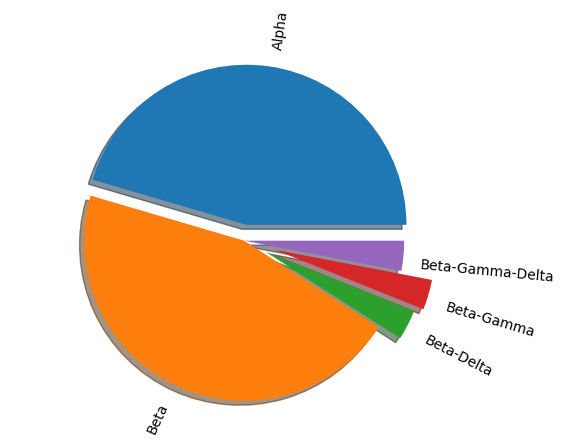

In [ ]:
# Кол-во групп активных областей в 2019 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2019'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.1098875733398474,
 1.3078619987418447,
 -1.1049611972914148,
 1.204521912546771)

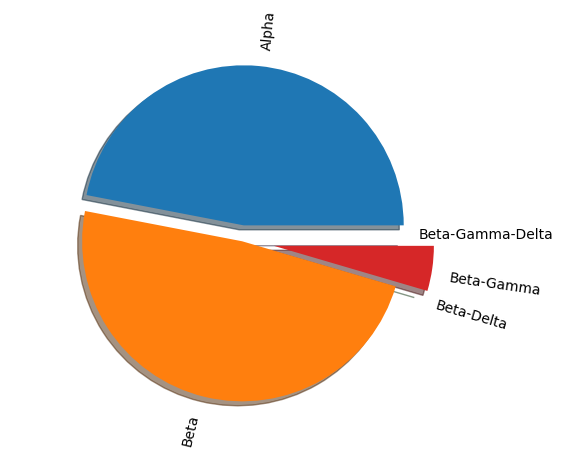

In [ ]:
# Кол-во групп активных областей в 2020 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2020'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.1093109920828585,
 1.2958694239853303,
 -1.1048452254801877,
 1.2019119850794449)

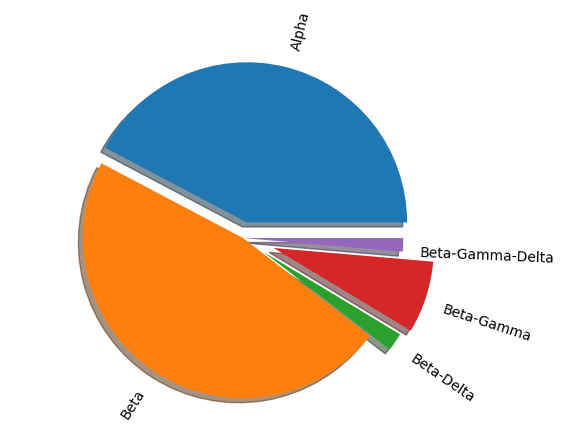

In [ ]:
# Кол-во групп активных областей в 2021 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2021'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.1086196532452561,
 1.281013054168043,
 -1.1046488945550432,
 1.1976269598915745)

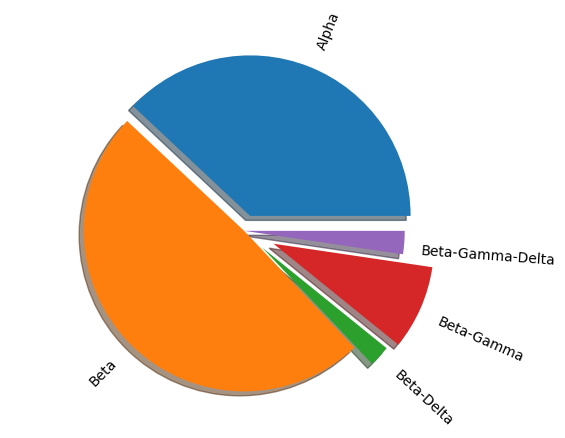

In [ ]:
# Кол-во групп активных областей в 2022 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2022'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.105663455186116,
 1.2191314613966002,
 -1.201268355222154,
 1.1987969656086155)

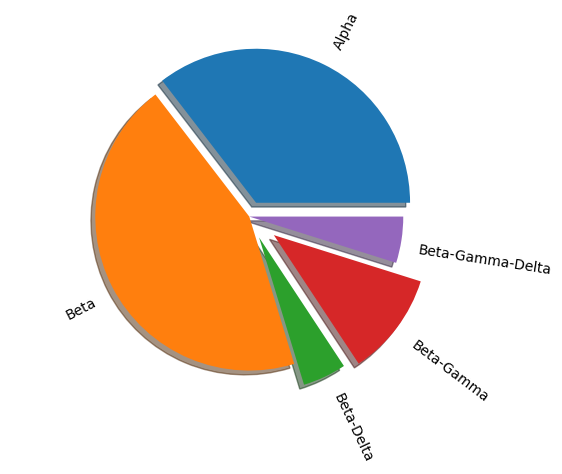

In [ ]:
# Кол-во групп активных областей в 2023 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2023'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

Во всех годах преобладает альфа и бэтта магнитные типы групп. Остальные проявились достаточно сильно в 2023 году.

### Выводы по 1 Блоку:


Во всех годах признак "Е" имеет правостороннеее распределение (то есть, распределение гистограммы скошено вправо - среднне значение больше медианы). Значения в данном признаке совсем маленькие, большая часть значений скопились около 0. Это видно и по блочной диаграмме. Есть много выбросов свыше 3 квартиля - 75%-го процентиля, то есть одиночные большие значения с плавным нарастанием по годам.

В сравненнии признака выброса Энергии по годам, виден явный рост с 2019 года по настоящее время. Даже половина 2023 года уже почти догнало 2022 год.

Также и по признаку "Продолжительность в минутах" распределение скошено вправо, присутствуют отдельные пики в правой части, о чём и свидетельствуют выбросы в 3 квартиле блочной диаграммы.

Активная область 0 проявила себя в 2020, 2022 и 2023 годах, как по количеству вспышек, так и по максимальному значению продолжительности в минутах.

Общая картина по всем признакам: явный рост значений с годами. Как и продолжительности в минутах, так и по кол-ву активных групп, значений энергии, и кол-ву вспышек.

Распределение по признаку "Число пятен в группе" скошено вправо, СКО от среднего далеки. Разброс значений очевиден по блочной диаграмме - присутствуют выбросы свыше 3 квартиля.

По всем годам, можно сделать общий вывод: есть корреляция у значений Число пятен, протяжённсть, площадь. В 2019 и 2020 году, в корреляции присутствуют значения Кэррингтоновской долготы, но в последующие года - коэффициент корреляции отсутствует. С Керрингтоновской долготой всё понятно, это географическое обозначение пятна, поэтому и корреляции не подвержена.

Проанализированы вспышки класса Х, и определено, что слабая магнитная буря была в один день в 2022 году.Это значит, что солнечная вспышка происходит не вблизи центра обращенного к Земле солнечного диска.

Предварительный вывод: площадь и протяжённость зависит от числа пятен в тот или иной день не в точности неверен.

Классификация по системе Цюриха не влияет на число пятен, а скорее просто описывает характер пятен и их физические и магнитные свойства. А вот магнитный тип имеет сязь с числом пятен. Максимальные значения пятен за тот или иной день возникают в магнитных типах группы Beta (Группа солнечных пятен, которая имеет положительную и отрицательную полярность (биполярная) с простым делением между полярностями), Beta-Gamma-Delta (Группа солнечных пятен с бета-гамма-магнитной
конфигурацией - не биполярной, но содержит одно (или более) дельта-пятно - противоположная полярность в одной полутени) и Beta-Gamma (Биполярная группа солнечных пятен, но достаточно сложная, так что ни одна силовая линия магнитного поля не может быть проведена между пятнами противоположной полярности). Однако чаще всего (по количеству пятен) тёмные пятна возникают в магнитных типах Альфа и Бэтта. Они преобладают во всех годах. В 2023 году проявился третий тип магнитных пятен - Beta-Gamma.

Максимальное число пятен не пересекается по магнитным группам. Да есть повторы в магнитных группах, но связь магнитного типа группы и числа пятен очевидна.

 Связь магнитного типа группы и Группы по Цюриху доказа - определённые группы  повторяются в магнитных группах типа Бэтта, Бэтта-Гамма, Бэтта-Гамма-Бэтта, Бэтта-Бэтта, что вполне логичного - это биполярные с простой и сложной организацией силовых магнитных линий. В Альфа - есть группы по Цюриху, которые не повтоярются в других биполярных магнитных типах группы - Axx,Hax,Hhx,Hrx,Hsx,Hkx,Bxo - это группы с одним маленькоим либо большим пятном с разной степенью симметричности.

Классификация по Цюриху коррелирует с площадью, протяжённость и частично с кэррингтоновской долготой. Проанализировав эту взаимосвязь, определили группы, которые повтоярются в первых пяти максимальных значениях площади и протяжённости по каждому году: по протяжённости - группы F и по площади - E.  
Также проанализированы протяжённость и площадь на максимальных значениях одновременно - показались группы F,Е,D. Группа F представляет наибольший интерес, поскольку способна порождать крупные вспышки. К тому же данная группа с максимальными значениями по площади и протяжённости определяются в магнитных типах группы с простой и сложной биполярностью - β, β-γ, β-δ, β-γ-δ.

Итак, построим цепочку взаимосвязей - во-первых возникает связь числа пятен и магнитного типа группы, от неё тянутся дальнейшие связи: магнитный тип группы и классификация группы по модифицированной системе Цюрриха, от которой зависит площадь, протяжённость и долгота.


### 2 Блок - продолжительность вспышки и излучение, тип магнитной группы

##### Что исследуем:

1. самое большое значение Энергии в какой день.
2. самая длительная вспышка.
3. в каких активных областях больше всего вспышек и какого класса по каждому году.

самое большое значение Энергии в какой день и описать характеристики магнитные.

In [ ]:
dfsun_act19.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
39,Вспышка балла C,9.9,2740,2019-05-06 08:04:00,2019-05-06 08:12:00,2019-05-06,0.000010,8,N08 E54,4.0,Dho,280.0,4.0,307.0,Beta-Delta
35,Вспышка балла C,7.3,2740,2019-05-06 16:35:00,2019-05-06 16:57:00,2019-05-06,0.000007,22,N08 E54,4.0,Dho,280.0,4.0,307.0,Beta-Delta
45,Вспышка балла C,6.7,2740,2019-05-10 08:40:00,2019-05-10 08:56:00,2019-05-10,0.000007,16,N08 W00,4.0,Cao,120.0,3.0,307.0,Beta


In [ ]:
dfsun_act20.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
40,Вспышка балла M,4.4,0,2020-11-29 15:34:00,2020-11-29 16:41:00,2020-11-29,0.000044,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Вспышка балла M,4.4,0,2020-11-30 15:34:00,2020-11-30 16:41:00,2020-11-30,0.000044,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Вспышка балла M,1.1,0,2020-05-30 10:13:00,2020-05-30 10:28:00,2020-05-30,0.000011,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act21.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
112,Вспышка балла X,1.5,2838,2021-07-03 17:18:00,2021-07-03 17:34:00,2021-07-03,0.000150,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,Вспышка балла X,1.0,2887,2021-10-28 18:17:00,2021-10-28 18:48:00,2021-10-28,0.000100,31,S26 E04,26.0,Dhi,250.0,8.0,275.0,Beta-Gamma
174,Вспышка балла M,4.7,2860,2021-08-28 08:39:00,2021-08-28 09:23:00,2021-08-28,0.000047,44,S28 E03,22.0,Eki,330.0,12.0,1.0,Beta-Gamma


In [ ]:
dfsun_act22.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
39,Вспышка балла C,9.9,2740,2019-05-06 08:04:00,2019-05-06 08:12:00,2019-05-06,0.000010,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Вспышка балла C,7.3,2740,2019-05-06 16:35:00,2019-05-06 16:57:00,2019-05-06,0.000007,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Вспышка балла C,6.7,2740,2019-05-10 08:40:00,2019-05-10 08:56:00,2019-05-10,0.000007,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act23.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
41,Вспышка балла X,2.2,3229,2023-02-17 22:38:00,2023-02-17 23:50:00,2023-02-17,0.00022,72,N30 E70,2.0,Dao,240.0,6.0,36.0,Beta
225,Вспышка балла X,2.1,3234,2023-03-03 20:42:00,2023-03-03 20:59:00,2023-03-03,0.00021,17,N25 W63,20.0,Ekc,830.0,14.0,345.0,Beta-Gamma-Delta
168,Вспышка балла X,1.9,3184,2023-01-09 21:37:00,2023-01-09 21:57:00,2023-01-09,0.00019,20,S13 E81,3.0,Hax,240.0,3.0,179.0,Alpha


Самое большое значение Энергии за весь период выпало на 03.07.2021. Вспышка длилась 16 минут. К сожалдению не к каждой вспышке есть информация о магнитном типе активной области, что не даёт возможности описать магнитные характеристики.

самая длительная вспышка.

In [ ]:
dfsun_act19.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
43,Вспышка балла C,1.2,2740,2019-05-08 12:51:00,2019-05-08 13:58:00,2019-05-08,0.000001,67,N08 E28,6.0,Cso,240.0,5.0,306.0,Beta
41,Вспышка балла C,1.2,2740,2019-05-07 12:51:00,2019-05-07 13:58:00,2019-05-07,0.000001,67,N07 E40,4.0,Cso,200.0,3.0,308.0,Beta-Delta
31,Вспышка балла C,1.0,2740,2019-05-04 01:49:00,2019-05-04 02:49:00,2019-05-04,0.000001,60,N12 E80,1.0,Hhx,260.0,4.0,307.0,Alpha


In [ ]:
dfsun_act20.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
0,Вспышка балла C,2.6,0,2020-11-26 22:20:00,2020-11-27 02:53:00,2020-11-26,0.000003,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Вспышка балла C,7.4,2790,2020-12-08 18:46:00,2020-12-08 20:33:00,2020-12-08,0.000007,107,S22 W15,1.0,Hsx,50.0,2.0,251.0,Alpha
19,Вспышка балла C,7.4,2790,2020-12-07 18:46:00,2020-12-07 20:33:00,2020-12-07,0.000007,107,S23 W02,1.0,Hsx,60.0,2.0,252.0,Alpha


In [ ]:
dfsun_act21.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
205,Вспышка балла C,1.6,2871,2021-09-18 10:48:00,2021-09-19 02:48:00,2021-09-18,0.000002,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Вспышка балла C,1.3,2824,2021-05-22 10:10:00,2021-05-22 17:03:00,2021-05-22,0.000001,413,N20 E27,3.0,Hsx,150.0,3.0,194.0,Alpha
319,Вспышка балла M,1.7,2891,2021-11-02 04:20:00,2021-11-02 06:50:00,2021-11-02,0.000017,150,N16 E03,17.0,Dai,230.0,8.0,210.0,Beta


In [ ]:
dfsun_act22.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
43,Вспышка балла C,1.2,2740,2019-05-08 12:51:00,2019-05-08 13:58:00,2019-05-08,0.000001,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Вспышка балла C,1.2,2740,2019-05-07 12:51:00,2019-05-07 13:58:00,2019-05-07,0.000001,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Вспышка балла C,1.0,2740,2019-05-04 01:49:00,2019-05-04 02:49:00,2019-05-04,0.000001,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act23.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
642,Вспышка балла C,3.7,3214,2023-02-14 08:08:00,2023-02-14 15:02:00,2023-02-14,0.000004,414,N11 W60,6.0,Eko,360.0,11.0,206.0,Beta
794,Вспышка балла C,3.5,3276,2023-04-10 07:14:00,2023-04-10 12:37:00,2023-04-10,0.000003,323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Вспышка балла C,4.0,0,2023-01-03 10:42:00,2023-01-03 15:33:00,2023-01-03,0.000004,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Самая длительная вспышка пришлась на 18.09.2021 - 960 минут! Получается вспышка длилась аж 16 часов. Но выход Энергии был очень мал.

В каких активных областях больше всего вспышек по каждому году.

In [ ]:
print(pd.pivot_table(dfsun_act19, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act20, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act21, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act22, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act23, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())

                                   E
Активная область Класс              
2736             Вспышка балла C  18
2740             Вспышка балла C  15
2733             Вспышка балла C   9
2732             Вспышка балла C   2
2734             Вспышка балла C   2
                                   E
Активная область Класс              
2781             Вспышка балла C  25
2786             Вспышка балла C  18
2779             Вспышка балла C  14
0                Вспышка балла C  13
2790             Вспышка балла C   8
                                   E
Активная область Класс              
2907             Вспышка балла C  61
0                Вспышка балла C  50
2891             Вспышка балла C  28
2824             Вспышка балла C  28
2887             Вспышка балла C  26
                                   E
Активная область Класс              
2736             Вспышка балла C  18
2740             Вспышка балла C  15
2733             Вспышка балла C   9
2732             Вспышка балла C   2
2

В 2019 и 2022 годах в активной области 2736 больше всего вспышек. Также достаточно часто повторяются области 2740, 2733, 2732, 2734.

Самая длительная вспышка пришлась на 18.09.2021 - 960 минут! Получается вспышка длилаь аж 16 часов. Но выход Энергии был очень мал.

Самое большое значение Энергии за весь период выпало на 03.07.2021. Вспышка длилась 16 минут. К сожалдению не к каждой вспышке есть информация о магнитном типе активной области.

Для исследования природы вспышек соединим датасеты о солнечных вспышках и активных областях. Данные чётко не соединяться и будут отсутвующие данные об активных областях за тот или иной день, в которые произошли солнесные вспышки.
Такое допустимо, если область пятен либо не видна из-за эффектов проекции, либо даже находится на обратной стороне Солнца, за его краем и получить данные о них не представляется возможным. Фундаментально - вспышки без активной области не может быть.

In [ ]:
dfsun_act19d = dfsun_act19.dropna()
dfsun_act20d = dfsun_act20.dropna()
dfsun_act21d = dfsun_act21.dropna()
dfsun_act23d = dfsun_act23.dropna()

In [ ]:
dfsun_act19d.head()

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
0,Вспышка балла C,1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,0.000002,29,N10 W74,3.0,Bxo,10.0,7.0,217.0,Beta
1,Вспышка балла C,1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,0.000002,29,N09 W85,2.0,Bxo,10.0,5.0,213.0,Beta
2,Вспышка балла C,5.0,2733,2019-01-26 16:12:00,2019-01-26 16:34:00,2019-01-26,0.000005,22,N06 W20,17.0,Dri,50.0,9.0,259.0,Beta
3,Вспышка балла C,5.0,2733,2019-01-27 16:12:00,2019-01-27 16:34:00,2019-01-27,0.000005,22,N06 W34,16.0,Dsi,80.0,10.0,260.0,Beta
4,Вспышка балла C,1.9,2733,2019-01-29 13:21:00,2019-01-29 13:40:00,2019-01-29,0.000002,19,N06 W61,6.0,Cso,80.0,10.0,261.0,Beta


In [ ]:
pd.pivot_table(dfsun_act19d, index=['Магнитный тип группы', 'Класс'], values='Число пятен в группе', aggfunc='count')

,,Число пятен в группе
Магнитный тип группы,Класс,
Alpha,Вспышка балла C,5
Beta,Вспышка балла C,21
Beta-Delta,Вспышка балла C,9
Beta-Gamma,Вспышка балла C,6
Beta-Gamma-Delta,Вспышка балла C,6


In [ ]:
pd.pivot_table(dfsun_act20d, index=['Магнитный тип группы', 'Класс'], values='Число пятен в группе', aggfunc='count')

,,Число пятен в группе
Магнитный тип группы,Класс,
Alpha,Вспышка балла C,11
Beta,Вспышка балла C,57
Beta-Gamma,Вспышка балла C,14


In [ ]:
pd.pivot_table(dfsun_act21d, index=['Магнитный тип группы','Класс'], values='Число пятен в группе', aggfunc='count')

Число пятен в группе
Магнитный тип группы Класс                                
Alpha                Вспышка балла C                    36
                     Вспышка балла M                     1
Beta                 Вспышка балла C                   204
                     Вспышка балла M                    10
Beta-Delta           Вспышка балла C                     6
                     Вспышка балла M                     1
Beta-Gamma           Вспышка балла C                   119
                     Вспышка балла M                     8
                     Вспышка балла X                     1
Beta-Gamma-Delta     Вспышка балла C                     5

In [ ]:
dfsun_act21d[dfsun_act21d['Класс']=='Вспышка балла X']

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
284,Вспышка балла X,1.0,2887,2021-10-28 18:17:00,2021-10-28 18:48:00,2021-10-28,0.0001,31,S26 E04,26.0,Dhi,250.0,8.0,275.0,Beta-Gamma


Солнечная вспышка произошла в группе с 26 пятнами в магнитной биполярной группе со сложной системой силовых магнитных линий. Классификация Цюриха характеризует дщанную группу  пятен среднего размера с магнитной сложностью вызывать вспышки С и М-классов. Однако фактически данная группа пятен смогла породить сильную вспышку, но с незначительным выходом энергии.

In [ ]:
pd.pivot_table(dfsun_act23d, index=['Магнитный тип группы', 'Класс'], values='Число пятен в группе', aggfunc='count')

Число пятен в группе
Магнитный тип группы Класс                                
Alpha                Вспышка балла C                    69
                     Вспышка балла M                    11
                     Вспышка балла X                     1
Beta                 Вспышка балла C                   532
                     Вспышка балла M                    65
                     Вспышка балла X                     3
Beta-Delta           Вспышка балла C                    70
                     Вспышка балла M                    27
                     Вспышка балла X                     1
Beta-Gamma           Вспышка балла C                   252
                     Вспышка балла M                    36
                     Вспышка балла X                     1
Beta-Gamma-Delta     Вспышка балла C                   134
                     Вспышка балла M                    25
                     Вспышка балла X                     2

In [ ]:
dfsun_act23d[dfsun_act23d['Класс']=='Вспышка балла X'].sort_values(by='Магнитный тип группы', ascending=False)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
225,Вспышка балла X,2.1,3234,2023-03-03 20:42:00,2023-03-03 20:59:00,2023-03-03,0.00021,17,N25 W63,20.0,Ekc,830.0,14.0,345.0,Beta-Gamma-Delta
369,Вспышка балла X,1.1,3217,2023-02-11 18:40:00,2023-02-11 18:54:00,2023-02-11,0.00011,14,S11 E49,11.0,Dki,380.0,9.0,136.0,Beta-Gamma-Delta
1259,Вспышка балла X,1.2,3256,2023-03-29 05:18:00,2023-03-29 05:40:00,2023-03-29,0.00012,22,S22 W62,10.0,Fho,340.0,16.0,1.0,Beta-Gamma
1501,Вспышка балла X,1.0,3186,2023-01-11 01:39:00,2023-01-11 01:52:00,2023-01-11,0.00010,13,N25 E65,5.0,Dso,100.0,2.0,168.0,Beta-Delta
41,Вспышка балла X,2.2,3229,2023-02-17 22:38:00,2023-02-17 23:50:00,2023-02-17,0.00022,72,N30 E70,2.0,Dao,240.0,6.0,36.0,Beta
260,Вспышка балла X,1.1,3341,2023-06-20 19:42:00,2023-06-20 20:26:00,2023-06-20,0.00011,44,S13 E62,2.0,Cso,100.0,8.0,219.0,Beta
1362,Вспышка балла X,1.2,3182,2023-01-06 03:43:00,2023-01-06 04:07:00,2023-01-06,0.00012,24,S17 E72,4.0,Dki,280.0,1.0,226.0,Beta
168,Вспышка балла X,1.9,3184,2023-01-09 21:37:00,2023-01-09 21:57:00,2023-01-09,0.00019,20,S13 E81,3.0,Hax,240.0,3.0,179.0,Alpha


В этом списке примечатеьна вспышка 09.01.2023, возникшая в однополярной магнитной группе с числом пятен 3 и классификацией по Цюриху - Hax - одиночное солнечное пятно с небольшой ассимтричность в открытой группе. При чём продолжительность вспышки была аж 20 минут и с довольно значимым выходом энергии. Из всех вспышек интересна вспышка в сложной биполярной магнитнойгруппе с классификацией по Цюриху - Fho. Как уже описывалось, эти группы способны производить крупные вспышки класса Х. В данной группе 10 пятен, с большой симметричностью в открытой группе. Данная вспышка произошла 29.03.2023, со средним выходом энергии и длилась 22 минуты.


#### Выводы по 2 Блоку:


По итогам анализа были определены активной области с большим кол-м вспышек -
 2736, 2740, 2733, 2732, 2734.

Самая длительная вспышка пришлась на 18.09.2021 - 960 минут! - 16 часов, с минимальным выходом энергии.

Самое большое значение Энергии за весь период выпало на 03.07.2021. Вспышка длилась 16 минут. К сожалдению не к каждой вспышке есть информация о магнитном типе активной области.

Для дальнейшего исследования природы вспышек были соеденены датасеты о солнечных вспышках и активных областях. Посокльку в данных получились пропуски, из-за отсутствия информации об активных областях в связи с технической особенностью, было принято решение урезать датасет и оставить только заполненные данные.

По полученному соединённому датасету вспышки класса Х проявлялись в 2021 и 2023 годах. В 2021 году солнечная вспышка произошла в группе с 26 пятнами в магнитной биполярной группе со сложной системой силовых магнитных линий. Классификация Цюриха характеризует дщанную группу пятен среднего размера с магнитной сложностью вызывать вспышки С и М-классов. Однако фактически данная группа пятен смогла породить сильную вспышку, но с незначительным выходом энергии.

В 2023 году  примечатеьна вспышка 09.01.2023, возникшая в однополярной магнитной группе с числом пятен 3 и классификацией по Цюриху - Hax - одиночное солнечное пятно с небольшой ассимтричность в открытой группе. При чём продолжительность вспышки была аж 20 минут и с довольно значимым выходом энергии. Также интересна вспышка в сложной биполярной магнитнойгруппе с классификацией по Цюриху - Fho. Как уже описывалось, эти группы способны производить крупные вспышки класса Х. В данной группе 10 пятен, с большой симметричностью в открытой группе. Данная вспышка произошла 29.03.2023, со средним выходом энергии и длилась 22 минуты.

Как видно из данных, солнечные вспышки не возникают только в определённых магнитных группах, они могут возникнуть и из однополярной и из биполярной магнитной группы, с различной классификациейц группы по Цюриху, с различным выходом Энергии и числом пятен. Но из всех крупных вспышек класса Х, большинство вспышек произошло в простой и сложной биполярной магнитной группе. Относительно общего количн=ества вспышек, то максимальное количнство вспышек произошли в классе С магнитной группы Бетта - биполярная, с простым делением между полярностями.

#### 3 Блок - Магнитные бури

Посмотрим на корреялцию Пирсона.

In [ ]:
magnetic_storms_2019.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-8-d0b236c13bf7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  magnetic_storms_2019.corr().style.background_gradient(cmap='RdYlGn')


,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),1.000000,0.010949,-0.018723,0.005506
Усредненный планетарный A-индекс,0.010949,1.000000,0.748984,0.801117
Усредненный планетарный Kp-индекс,-0.018723,0.748984,1.000000,0.895584
Значения в нанотесла Kp-индекса,0.005506,0.801117,0.895584,1.000000


In [ ]:
magnetic_storms_2020.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-9-777d1d1c078f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  magnetic_storms_2020.corr().style.background_gradient(cmap='RdYlGn')


,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),1.000000,0.059496,0.033096,0.018946
Усредненный планетарный A-индекс,0.059496,1.000000,0.772766,0.845594
Усредненный планетарный Kp-индекс,0.033096,0.772766,1.000000,0.928980
Значения в нанотесла Kp-индекса,0.018946,0.845594,0.928980,1.000000


In [ ]:
magnetic_storms_2021.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-10-0a0b54832185>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  magnetic_storms_2021.corr().style.background_gradient(cmap='RdYlGn')


,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),1.000000,0.050776,0.046637,0.019611
Усредненный планетарный A-индекс,0.050776,1.000000,0.689022,0.753871
Усредненный планетарный Kp-индекс,0.046637,0.689022,1.000000,0.899923
Значения в нанотесла Kp-индекса,0.019611,0.753871,0.899923,1.000000


In [ ]:
magnetic_storms_2022.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-11-248dd3d51e1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  magnetic_storms_2022.corr().style.background_gradient(cmap='RdYlGn')


,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),1.000000,0.020481,-0.027442,-0.064896
Усредненный планетарный A-индекс,0.020481,1.000000,0.714504,0.714404
Усредненный планетарный Kp-индекс,-0.027442,0.714504,1.000000,0.919936
Значения в нанотесла Kp-индекса,-0.064896,0.714404,0.919936,1.000000


In [ ]:
magnetic_storms_2023.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-12-a93fa4176df0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  magnetic_storms_2023.corr().style.background_gradient(cmap='RdYlGn')


,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),1.000000,-0.013539,0.018124,-0.039633
Усредненный планетарный A-индекс,-0.013539,1.000000,0.685374,0.734638
Усредненный планетарный Kp-индекс,0.018124,0.685374,1.000000,0.856302
Значения в нанотесла Kp-индекса,-0.039633,0.734638,0.856302,1.000000


Как видно, А-индекс хорошо коллерирует с Kp-индексом и соответственно со значением Kp-индекса в нанотесла. А вот поток радиоизлучения не показывает корреляции вообще.

Как сказано в описании: "При использовании совместно с K-индексом необходимо обращать внимание на то, что, если оба индекса имеют высокие значения, то геомагнитное поле Земли неустойчиво. Резкое возрастание индекса K при низком значении индекса А указывает на внезапное, резкое возмущение геомагнитного поля, которое может вызвать интенсивное, но кратковременные перебои, вызвать появление северного сияния."

Рассммотрим сводный датасет магнитной активности по годам.

In [ ]:
df19 = pd.pivot_table(magnetic_storms_2019, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-19'})
df20 = pd.pivot_table(magnetic_storms_2020, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-20'})
df21 = pd.pivot_table(magnetic_storms_2021, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-21'})
df22 = pd.pivot_table(magnetic_storms_2022, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-22'})
df23 = pd.pivot_table(magnetic_storms_2023, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-23'})
dfall = df19.merge(df20, on='Балл магнитного шторма', how='outer').merge(df21, on='Балл магнитного шторма', how='outer').merge(df22, on='Балл магнитного шторма', how='outer').merge(df23, on='Балл магнитного шторма', how='outer').fillna(0)
dfall

,Балл магнитного шторма,Дата-19,Дата-20,Дата-21,Дата-22,Дата-23
0,G1,15.0,10.0,24.0,42.0,0.0
1,G2,3.0,1.0,3.0,8.0,3.0
2,G3,1.0,0.0,2.0,1.0,3.0
3,не было магнитных бурь,344.0,355.0,335.0,272.0,174.0
4,G4,0.0,0.0,0.0,0.0,1.0


Как видно из сводного датасета, в 2023 году появилась первая сильная буря - балл G4. До 2023 года также явно видна тенденция на сокращение кол-ва дней без магнитных бурь. Посмотрим были ли солнечные вспышки в этот день.

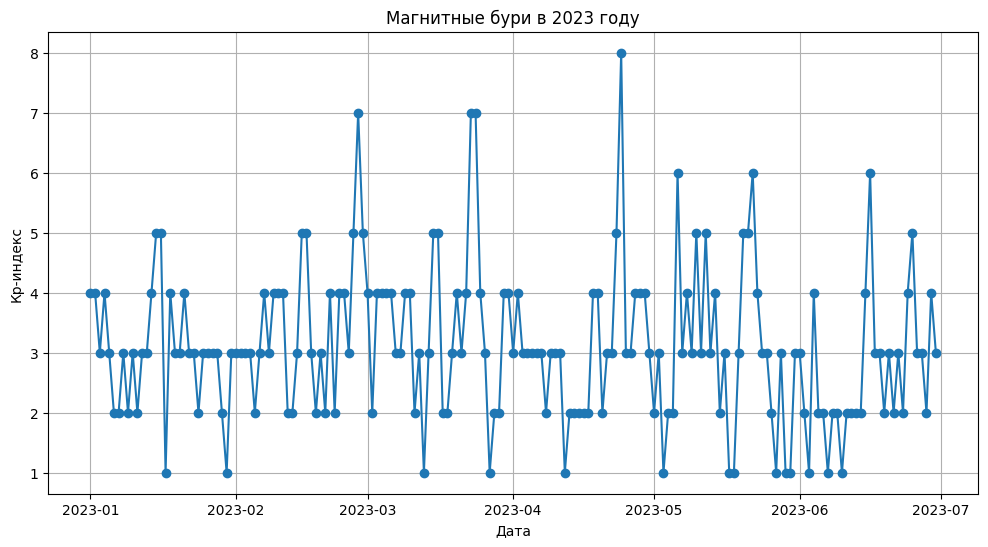

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(magnetic_storms_2023['Дата'], magnetic_storms_2023['Усредненный планетарный Kp-индекс'], marker='o', linestyle='-')
plt.title('Магнитные бури в 2023 году')
plt.xlabel('Дата')
plt.ylabel('Кр-индекс')
plt.grid(True)
plt.show()

In [ ]:
magnetic_storms_2023[magnetic_storms_2023['Балл магнитного шторма']=='G4']

,Дата,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса,Балл магнитного шторма
113,2023-04-24,135,78,8,440,G4


В день очень сильной бури значения в нанотесла равно 440. Посмотрим, максимальное было это значнеи в этот и день, и какое значение А-индекса.

In [ ]:
print(magnetic_storms_2023.sort_values(by='Значения в нанотесла Kp-индекса', ascending=False).head())

          Дата  Поток радиоизлучения (10.7 см)  \
113 2023-04-24                             135   
82  2023-03-24                             158   
57  2023-02-27                             161   
81  2023-03-23                             159   
141 2023-05-22                             163   

     Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
113                                78                                  8   
82                                 66                                  7   
57                                100                                  7   
81                                 47                                  7   
141                                28                                  6   

     Значения в нанотесла Kp-индекса Балл магнитного шторма  
113                              440                     G4  
82                               265                     G3  
57                               265                    

In [ ]:
print(magnetic_storms_2023.sort_values(by='Усредненный планетарный A-индекс', ascending=True).head())
print(magnetic_storms_2023.sort_values(by='Усредненный планетарный A-индекс', ascending=False).head())

          Дата  Поток радиоизлучения (10.7 см)  \
149 2023-05-30                             154   
137 2023-05-18                             138   
87  2023-03-29                             159   
86  2023-03-28                             159   
29  2023-01-30                             137   

     Усредненный планетарный A-индекс  Усредненный планетарный Kp-индекс  \
149                                 4                                  1   
137                                 4                                  1   
87                                  5                                  2   
86                                  5                                  2   
29                                  5                                  1   

     Значения в нанотесла Kp-индекса  Балл магнитного шторма  
149                                7  не было магнитных бурь  
137                                7  не было магнитных бурь  
87                                15  не было магнитн

Да, это максимальное значение в нанотесла, а вот значение А-индекса и не максимальное и не минимальное. Но, оно близко к максимальному. Значит, этот случай подходит под описание "...если оба индекса имеют высокие значения, то геомагнитное поле Земли неустойчиво.". Посмотрим были ли вспышки в этот день.

In [ ]:
dfsun_act23[dfsun_act23['Дата начала вспышки']=='2023-04-24']

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
257,Вспышка балла C,1.5,3285,2023-04-24 20:19:00,2023-04-24 20:31:00,2023-04-24,0.000002,12,S17 E44,7.0,Dao,190.0,9.0,272.0,Beta
328,Вспышка балла C,1.1,3282,2023-04-24 19:14:00,2023-04-24 19:29:00,2023-04-24,0.000001,15,N12 W70,8.0,Fki,300.0,16.0,26.0,Beta-Gamma
568,Вспышка балла C,2.8,3283,2023-04-24 15:59:00,2023-04-24 16:10:00,2023-04-24,0.000003,11,S22 W41,4.0,Bxo,10.0,7.0,358.0,Beta
683,Вспышка балла C,2.2,3282,2023-04-24 14:06:00,2023-04-24 14:20:00,2023-04-24,0.000002,14,N12 W70,8.0,Fki,300.0,16.0,26.0,Beta-Gamma


В этот день были 4 вспышки, но не высокого класса и с незначительным выходом Энергии.. Сильная магнитная активность спровоцировала выброс высокоэнергетичных заряженных частиц.

Соединим датасет о солнечных вспышках и активных областях с данными о магнитных бурях. Датасет о солнечных вспышках и активных областях за 2022 год не берём в учёт, поскольку нет общих данных с солнечными вспышками.

In [ ]:
dfsun_act19d['Дата начала вспышки'] = pd.to_datetime(dfsun_act19d['Дата начала вспышки'], format="%Y-%m-%d")
dfsun_act19dm = dfsun_act19d.merge(magnetic_storms_2019, left_on=['Дата начала вспышки'], right_on=['Дата'], how='left')
dfsun_act19dm.info()
dfsun_act19dm.to_excel('dfsun_act19dm.xlsx')
!cp dfsun_act19dm.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

<ipython-input-20-e4026474661b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsun_act19d['Дата начала вспышки'] = pd.to_datetime(dfsun_act19d['Дата начала вспышки'], format="%Y-%m-%d")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Класс                                                    47 non-null     object        
 1   Балл                                                     47 non-null     float64       
 2   Активная область                                         47 non-null     int64         
 3   Начало                                                   47 non-null     object        
 4   Окончание                                                47 non-null     object        
 5   Дата начала вспышки                                      47 non-null     datetime64[ns]
 6   E                                                        47 non-null     float64       
 7   Продолжительность в минутах                            

In [ ]:
dfsun_act20d['Дата начала вспышки'] = pd.to_datetime(dfsun_act20d['Дата начала вспышки'], format="%Y-%m-%d")
dfsun_act20dm = dfsun_act20d.merge(magnetic_storms_2020, left_on=['Дата начала вспышки'], right_on=['Дата'], how='left')
dfsun_act20dm.info()
dfsun_act20dm.to_excel('dfsun_act20dm.xlsx')
!cp dfsun_act20dm.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Класс                                                    82 non-null     object        
 1   Балл                                                     82 non-null     float64       
 2   Активная область                                         82 non-null     int64         
 3   Начало                                                   82 non-null     object        
 4   Окончание                                                82 non-null     object        
 5   Дата начала вспышки                                      82 non-null     datetime64[ns]
 6   E                                                        82 non-null     float64       
 7   Продолжительность в минутах                            

<ipython-input-21-124c6404fde4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsun_act20d['Дата начала вспышки'] = pd.to_datetime(dfsun_act20d['Дата начала вспышки'], format="%Y-%m-%d")


In [ ]:
dfsun_act21d['Дата начала вспышки'] = pd.to_datetime(dfsun_act21d['Дата начала вспышки'], format="%Y-%m-%d")
dfsun_act21dm = dfsun_act21d.merge(magnetic_storms_2021, left_on=['Дата начала вспышки'], right_on=['Дата'], how='left')
dfsun_act21dm.info()
dfsun_act21dm.to_excel('dfsun_act21dm.xlsx')
!cp dfsun_act21dm.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

<ipython-input-22-3597bfd24c05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsun_act21d['Дата начала вспышки'] = pd.to_datetime(dfsun_act21d['Дата начала вспышки'], format="%Y-%m-%d")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Класс                                                    391 non-null    object        
 1   Балл                                                     391 non-null    float64       
 2   Активная область                                         391 non-null    int64         
 3   Начало                                                   391 non-null    object        
 4   Окончание                                                391 non-null    object        
 5   Дата начала вспышки                                      391 non-null    datetime64[ns]
 6   E                                                        391 non-null    float64       
 7   Продолжительность в минутах                          

In [ ]:
dfsun_act23d['Дата начала вспышки'] = pd.to_datetime(dfsun_act23d['Дата начала вспышки'], format="%Y-%m-%d")
dfsun_act23dm = dfsun_act23d.merge(magnetic_storms_2023, left_on=['Дата начала вспышки'], right_on=['Дата'], how='left')
dfsun_act23dm.info()
dfsun_act23dm.to_excel('dfsun_act23dm.xlsx')
!cp dfsun_act23dm.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

<ipython-input-23-2ed48d0be342>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsun_act23d['Дата начала вспышки'] = pd.to_datetime(dfsun_act23d['Дата начала вспышки'], format="%Y-%m-%d")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Класс                                                    1229 non-null   object        
 1   Балл                                                     1229 non-null   float64       
 2   Активная область                                         1229 non-null   int64         
 3   Начало                                                   1229 non-null   object        
 4   Окончание                                                1229 non-null   object        
 5   Дата начала вспышки                                      1229 non-null   datetime64[ns]
 6   E                                                        1229 non-null   float64       
 7   Продолжительность в минутах                        

Посмотрим на корреляцию Пирсона.

In [ ]:
dfsun_act19dm.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-26-a643f9a5f41f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_act19dm.corr().style.background_gradient(cmap='RdYlGn')


,Балл,Активная область,E,Продолжительность в минутах,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Балл,1.000000,0.066159,1.000000,-0.168174,-0.040307,-0.036401,-0.022138,0.161975,-0.057916,-0.027943,0.183977,0.174415
Активная область,0.066159,1.000000,0.066159,-0.041310,-0.198321,0.471956,-0.645455,0.536295,0.078900,0.137402,0.062909,-0.024564
E,1.000000,0.066159,1.000000,-0.168174,-0.040307,-0.036401,-0.022138,0.161975,-0.057916,-0.027943,0.183977,0.174415
Продолжительность в минутах,-0.168174,-0.041310,-0.168174,1.000000,-0.330239,-0.220303,-0.246361,-0.376310,-0.428221,0.035322,0.318233,0.312094
Число пятен в группе,-0.040307,-0.198321,-0.040307,-0.330239,1.000000,0.354784,0.623560,0.126605,0.774640,-0.289743,-0.539017,-0.491432
Площадь (в миллионных долях солнечной полусферы),-0.036401,0.471956,-0.036401,-0.220303,0.354784,1.000000,0.256494,0.489366,0.504087,0.047633,-0.329753,-0.365365
Протяженность группы (в градусах),-0.022138,-0.645455,-0.022138,-0.246361,0.623560,0.256494,1.000000,0.040660,0.435213,-0.139638,-0.427297,-0.342110
Кэррингтоновская долгота группы (в градусах дуги),0.161975,0.536295,0.161975,-0.376310,0.126605,0.489366,0.040660,1.000000,0.412777,-0.064712,-0.244413,-0.266418
Поток радиоизлучения (10.7 см),-0.057916,0.078900,-0.057916,-0.428221,0.774640,0.504087,0.435213,0.412777,1.000000,-0.318098,-0.736816,-0.704532
Усредненный планетарный A-индекс,-0.027943,0.137402,-0.027943,0.035322,-0.289743,0.047633,-0.139638,-0.064712,-0.318098,1.000000,0.446878,0.432635


In [ ]:
dfsun_act20dm.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-27-41b85cdfd5d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_act20dm.corr().style.background_gradient(cmap='RdYlGn')


,Балл,Активная область,E,Продолжительность в минутах,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Балл,1.000000,0.202894,1.000000,0.447833,0.039585,-0.053422,-0.048115,0.065408,-0.084418,-0.089676,-0.035559,-0.051483
Активная область,0.202894,1.000000,0.202894,0.368944,0.029263,0.283153,0.113672,0.518233,0.664837,-0.401812,-0.176162,-0.295449
E,1.000000,0.202894,1.000000,0.447833,0.039585,-0.053422,-0.048115,0.065408,-0.084418,-0.089676,-0.035559,-0.051483
Продолжительность в минутах,0.447833,0.368944,0.447833,1.000000,-0.174214,-0.063029,-0.116421,-0.021565,0.106887,0.086371,0.048316,0.038502
Число пятен в группе,0.039585,0.029263,0.039585,-0.174214,1.000000,0.571100,0.779362,0.500770,0.441766,-0.026963,0.019561,0.005571
Площадь (в миллионных долях солнечной полусферы),-0.053422,0.283153,-0.053422,-0.063029,0.571100,1.000000,0.791440,0.738778,0.747426,-0.067325,0.223477,0.077094
Протяженность группы (в градусах),-0.048115,0.113672,-0.048115,-0.116421,0.779362,0.791440,1.000000,0.641000,0.573418,-0.159925,0.081895,-0.036889
Кэррингтоновская долгота группы (в градусах дуги),0.065408,0.518233,0.065408,-0.021565,0.500770,0.738778,0.641000,1.000000,0.729699,-0.448624,-0.130776,-0.208976
Поток радиоизлучения (10.7 см),-0.084418,0.664837,-0.084418,0.106887,0.441766,0.747426,0.573418,0.729699,1.000000,-0.187589,0.039362,-0.090779
Усредненный планетарный A-индекс,-0.089676,-0.401812,-0.089676,0.086371,-0.026963,-0.067325,-0.159925,-0.448624,-0.187589,1.000000,0.712477,0.786557


In [ ]:
dfsun_act21dm.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-28-f12b3cf3e3c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_act21dm.corr().style.background_gradient(cmap='RdYlGn')


,Балл,Активная область,E,Продолжительность в минутах,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Балл,1.000000,-0.004648,0.219266,0.110952,0.043433,0.059606,0.080739,-0.035222,0.017314,-0.036867,-0.021842,-0.046143
Активная область,-0.004648,1.000000,0.005991,-0.106038,0.200601,-0.021138,0.308647,0.293048,0.791738,0.091812,0.055384,-0.012398
E,0.219266,0.005991,1.000000,0.095280,0.157370,0.085023,0.062776,-0.016913,0.022897,-0.045156,-0.002951,-0.006232
Продолжительность в минутах,0.110952,-0.106038,0.095280,1.000000,-0.078613,-0.025625,-0.078208,-0.023520,-0.099633,-0.013819,-0.013278,-0.019847
Число пятен в группе,0.043433,0.200601,0.157370,-0.078613,1.000000,0.719297,0.662748,-0.063472,0.368513,0.081446,0.155200,0.120045
Площадь (в миллионных долях солнечной полусферы),0.059606,-0.021138,0.085023,-0.025625,0.719297,1.000000,0.542029,-0.155025,0.138011,0.056479,0.055955,0.049130
Протяженность группы (в градусах),0.080739,0.308647,0.062776,-0.078208,0.662748,0.542029,1.000000,0.043710,0.428850,0.112996,0.192544,0.121151
Кэррингтоновская долгота группы (в градусах дуги),-0.035222,0.293048,-0.016913,-0.023520,-0.063472,-0.155025,0.043710,1.000000,0.379318,0.074299,0.081907,0.044899
Поток радиоизлучения (10.7 см),0.017314,0.791738,0.022897,-0.099633,0.368513,0.138011,0.428850,0.379318,1.000000,0.108226,0.068506,0.011362
Усредненный планетарный A-индекс,-0.036867,0.091812,-0.045156,-0.013819,0.081446,0.056479,0.112996,0.074299,0.108226,1.000000,0.637920,0.706507


In [ ]:
dfsun_act23dm.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-29-175a6463051c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfsun_act23dm.corr().style.background_gradient(cmap='RdYlGn')


,Балл,Активная область,E,Продолжительность в минутах,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса
Балл,1.000000,-0.154057,0.087422,0.104648,0.039758,0.103471,0.094940,-0.002385,0.225920,-0.005581,0.004131,-0.044008
Активная область,-0.154057,1.000000,-0.099204,-0.039867,0.046004,-0.144994,0.000222,0.011122,-0.452473,0.033178,-0.011324,0.042719
E,0.087422,-0.099204,1.000000,0.129693,-0.014247,0.090190,0.039040,0.037453,0.189715,0.030323,0.003189,-0.020173
Продолжительность в минутах,0.104648,-0.039867,0.129693,1.000000,-0.035797,0.026267,-0.016709,-0.041002,0.021938,0.014396,0.037135,0.007506
Число пятен в группе,0.039758,0.046004,-0.014247,-0.035797,1.000000,0.631306,0.673946,0.062970,0.063774,0.058285,0.030101,-0.007667
Площадь (в миллионных долях солнечной полусферы),0.103471,-0.144994,0.090190,0.026267,0.631306,1.000000,0.601748,0.077657,0.208409,0.063616,0.042107,0.012469
Протяженность группы (в градусах),0.094940,0.000222,0.039040,-0.016709,0.673946,0.601748,1.000000,-0.017165,0.065320,0.070064,0.017253,0.017965
Кэррингтоновская долгота группы (в градусах дуги),-0.002385,0.011122,0.037453,-0.041002,0.062970,0.077657,-0.017165,1.000000,-0.049647,0.193256,0.191862,0.144895
Поток радиоизлучения (10.7 см),0.225920,-0.452473,0.189715,0.021938,0.063774,0.208409,0.065320,-0.049647,1.000000,0.003144,0.009118,-0.058706
Усредненный планетарный A-индекс,-0.005581,0.033178,0.030323,0.014396,0.058285,0.063616,0.070064,0.193256,0.003144,1.000000,0.760688,0.818179


Проанализировав все года, можно сделать вывод, что явно прослеживается корреляция с Площадью пятен.

На разных сайтах, посвящённых научному изучению Солнечной активности (например Мировой центр данных по Солнечно-Земной Физике: http://www.wdcb.ru/stp/solar/solar_flux.ru.html) дано описание потока радиоизлучения на длине волны в 10,7 см следующего характера: "После открытия радиоизлучения Солнца в 1947 г. введён новый индекс солнечной активности – поток радиоизлучения F10.7 c длиной волны 10.7 см (2800 МГц). Он измеряется в солнечных единицах потока:   1 с.е.п. = 10-22 Вт/(м2·Гц). Данный индекс характеризует изменения температуры и плотности на всём видимом диске Солнца. Его изменения хорошо коррелируют с изменениями чисел Вольфа и суммарной площади пятен". То есть коэффициент корреляции Пирсона, в отношении Числа пятен (Число Вольфа) и площади, подтвердился официальными данными.

В 2019-2021 годах поток радиоизлучения коррелирует с активной областью, протяжённостью, кэррингтоновской долготой. Однако, в 2023 году явной корреляции с признаками нет, а слабая корреляция показана в признаках Балл, Энергия и Площадь!!! Коэффициенты Числа пятен и Протяжённости и Долготы совсем близки к нулю.
Наблюдается также корреляция с Индексами магнитной активности в начале солнечного цикла. А в 2023 году корреляция близка к нулю.

Построим сводные таблицы для наглядной оценки результатов матрицы корреляции Пирсона

In [ ]:
pd.pivot_table(dfsun_act19dm, index='Поток радиоизлучения (10.7 см)', values=['Активная область', 'Число пятен в группе', 'Площадь (в миллионных долях солнечной полусферы)',
                                                                              'Протяженность группы (в градусах)',	'Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max')

,Активная область,Кэррингтоновская долгота группы (в градусах дуги),Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Число пятен в группе
Поток радиоизлучения (10.7 см),,,,,
72,2740,307,260,7,4
74,2741,307,270,10,5
76,2740,307,280,10,6
77,2733,260,80,10,17
79,2740,308,240,5,6
80,2736,283,50,5,6
82,2736,284,420,11,28


In [ ]:
pd.pivot_table(dfsun_act20dm, index='Поток радиоизлучения (10.7 см)', values=['Активная область', 'Число пятен в группе', 'Площадь (в миллионных долях солнечной полусферы)',
                                                                              'Протяженность группы (в градусах)',	'Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max')

,Активная область,Кэррингтоновская долгота группы (в градусах дуги),Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Число пятен в группе
Поток радиоизлучения (10.7 см),,,,,
73,2773,87,10,0,1
75,2770,24,70,6,4
77,2779,84,100,6,4
82,2783,87,80,7,7
83,2792,105,10,4,4
85,2783,155,140,10,7
88,2782,257,150,11,12
90,2790,256,250,12,18
91,2790,256,410,14,15


In [ ]:
pd.pivot_table(dfsun_act21dm, index='Поток радиоизлучения (10.7 см)', values=['Активная область', 'Число пятен в группе', 'Площадь (в миллионных долях солнечной полусферы)',
                                                                              'Протяженность группы (в градусах)',	'Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max')

,Активная область,Кэррингтоновская долгота группы (в градусах дуги),Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Число пятен в группе
Поток радиоизлучения (10.7 см),,,,,
74,2840,194,150,5,4
75,2871,335,190,4,9
76,2827,336,190,10,10
77,2859,335,280,7,8
78,2859,331,140,9,6
79,2871,359,190,13,9
80,2817,333,170,8,13
81,2894,87,160,8,4
82,2827,73,110,7,10


In [ ]:
pd.pivot_table(dfsun_act23dm, index='Поток радиоизлучения (10.7 см)', values=['Активная область', 'Число пятен в группе', 'Площадь (в миллионных долях солнечной полусферы)',
                                                                              'Протяженность группы (в градусах)',	'Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max')

,Активная область,Кэррингтоновская долгота группы (в градусах дуги),Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Число пятен в группе
Поток радиоизлучения (10.7 см),,,,,
134,3270,237,80,6,9
135,3305,358,300,16,24
136,3272,238,230,14,26
137,3289,284,140,13,12
138,3305,28,100,9,18
...,...,...,...,...,...
220,3196,169,950,18,17
222,3192,170,900,17,20
228,3192,229,880,18,21


Нельзя сказать, что значения Площади , Протяжённости и Числа пятен  распределились по значениям Потока радиоизлучения от малого к большему. Очень грубо и приблизительно, есть систематичность в распределении значений. Кэррингтоновская долгота в 2019 и 2020 году показала систематическое распределение значений, а вот в 2021 и 2023 годах - значения сильно пермешаны.
Значения Активной области, это Номера группы, оценивать их систематическое оаспределение не правильно. Может стоит посмотреть на частоту максимальных значений Потока радиоизлучения в Активных областях....

In [ ]:
pd.pivot_table(dfsun_act23dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

Балл
Поток радиоизлучения (10.7 см) Активная область      
343                            3229                 6
                               3226                 4
234                            3191                 3
                               3190                 3
                               3182                 2

In [ ]:
pd.pivot_table(dfsun_act23dm, index=['Поток радиоизлучения (10.7 см)'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

,Балл
Поток радиоизлучения (10.7 см),
343,10
234,8
228,14
222,7
220,10


In [ ]:
pd.pivot_table(dfsun_act23dm, index=['Поток радиоизлучения (10.7 см)'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=True).head()

,Балл
Поток радиоизлучения (10.7 см),
134,3
135,16
136,23
137,19
138,2


In [ ]:
pd.pivot_table(dfsun_act21dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

Балл
Поток радиоизлучения (10.7 см) Активная область      
140                            2917                 1
                               2916                 1
                               2908                 3
                               2907                19
137                            2909                 1

In [ ]:
pd.pivot_table(dfsun_act21dm, index=['Поток радиоизлучения (10.7 см)'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

,Балл
Поток радиоизлучения (10.7 см),
140,24
137,8
131,19
130,11
125,1


In [ ]:
pd.pivot_table(dfsun_act20dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

,,Балл
Поток радиоизлучения (10.7 см),Активная область,
116,2786,6
110,2786,3
109,2787,1
106,2786,4
105,2790,1


In [ ]:
pd.pivot_table(dfsun_act20dm, index=['Поток радиоизлучения (10.7 см)'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

,Балл
Поток радиоизлучения (10.7 см),
116,6
110,3
109,1
106,4
105,3


In [ ]:
pd.pivot_table(dfsun_act19dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

,,Балл
Поток радиоизлучения (10.7 см),Активная область,
82,2736,12
80,2736,5
79,2740,4
77,2733,2
76,2733,1


In [ ]:
pd.pivot_table(dfsun_act19dm, index=['Поток радиоизлучения (10.7 см)'], values=['Балл'], aggfunc='count').sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

,Балл
Поток радиоизлучения (10.7 см),
82,12
80,5
79,4
77,2
76,10


In [ ]:
df23p=pd.pivot_table(dfsun_act23dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count')
df23p = df23p.reset_index()

df21p=pd.pivot_table(dfsun_act21dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count')
df21p = df21p.reset_index()

df20p=pd.pivot_table(dfsun_act20dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count')
df20p = df20p.reset_index()

df19p=pd.pivot_table(dfsun_act19dm, index=['Поток радиоизлучения (10.7 см)', 'Активная область'], values=['Балл'], aggfunc='count')
df19p = df19p.reset_index()

dfallp = df19p.merge(df20p, on=['Поток радиоизлучения (10.7 см)',	'Активная область'], how='outer')
dfallp = dfallp.merge(df21p, on=['Поток радиоизлучения (10.7 см)',	'Активная область'], how='outer')
dfallp = dfallp.merge(df23p, on=['Поток радиоизлучения (10.7 см)',	'Активная область'], how='outer')
dfallp.columns=['Поток радиоизлучения (10.7 см)',	'Активная область', '2019', '2020', '2021', '2023']
dfallp.head()

<ipython-input-25-5767f943a1fb>:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Балл_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfallp = dfallp.merge(df23p, on=['Поток радиоизлучения (10.7 см)',	'Активная область'], how='outer')


,Поток радиоизлучения (10.7 см),Активная область,2019,2020,2021,2023
0,72,2732,2.0,NaN,NaN,NaN
1,72,2734,2.0,NaN,NaN,NaN
2,72,2740,1.0,NaN,NaN,NaN
3,74,2733,6.0,NaN,NaN,NaN
4,74,2740,1.0,NaN,NaN,NaN


In [ ]:
dfallp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 538
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Поток радиоизлучения (10.7 см)  539 non-null    int64  
 1   Активная область                539 non-null    int64  
 2   2019                            12 non-null     float64
 3   2020                            30 non-null     float64
 4   2021                            130 non-null    float64
 5   2023                            367 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 29.5 KB


In [ ]:
dfallp.head(20)

,Поток радиоизлучения (10.7 см),Активная область,2019,2020,2021,2023
0,72,2732,2.0,NaN,NaN,NaN
1,72,2734,2.0,NaN,NaN,NaN
2,72,2740,1.0,NaN,NaN,NaN
3,74,2733,6.0,NaN,NaN,NaN
4,74,2740,1.0,NaN,NaN,NaN
5,74,2741,2.0,NaN,NaN,NaN
6,76,2733,1.0,NaN,NaN,NaN
7,76,2740,9.0,NaN,NaN,NaN
8,77,2733,2.0,NaN,NaN,NaN
9,79,2740,4.0,NaN,NaN,NaN


In [ ]:
dfallp.tail()

,Поток радиоизлучения (10.7 см),Активная область,2019,2020,2021,2023
534,234,3182,NaN,NaN,NaN,2.0
535,234,3190,NaN,NaN,NaN,3.0
536,234,3191,NaN,NaN,NaN,3.0
537,343,3226,NaN,NaN,NaN,4.0
538,343,3229,NaN,NaN,NaN,6.0


In [ ]:
dfallp.sort_values(by='Активная область', ascending=False).head(20)

,Поток радиоизлучения (10.7 см),Активная область,2019,2020,2021,2023
298,158,3354,NaN,NaN,NaN,4.0
341,162,3354,NaN,NaN,NaN,11.0
264,155,3354,NaN,NaN,NaN,6.0
297,158,3351,NaN,NaN,NaN,1.0
263,155,3351,NaN,NaN,NaN,1.0
340,162,3348,NaN,NaN,NaN,1.0
262,155,3348,NaN,NaN,NaN,1.0
396,169,3342,NaN,NaN,NaN,7.0
457,180,3342,NaN,NaN,NaN,2.0
327,161,3341,NaN,NaN,NaN,1.0


Выделить какую-то определённую Активную область часто повторяющуюся в максимальных значениях Потока радиоизлучения не получилось. Значения разбросаны, а вот кол-во вспышек во всех исследуемых годах, кроме 2021 показаны максимальными. При чём хорошо заметен рост значений Потока радиоизлучения с годами: в 2019 году максимальное значение - 82 с кол-м вспышек 12, в 2020 году - 116 и 6 вспышек, в 2021 - 140 и 24 вспышки, в 2023 - 343 и 10 вспышек. А минимальное значение Потока радиоизлучения в 2023 году - 134.

По совей сути поток радиоизлучения на определённой  длине волны (в представленных данных - это длина волны в 10,7 см) говорит об активности Солнца. Наглядно можно посмотреть, отсортировав датасет по максимальным и минимальным значениям потока радиоизлчения.

In [ ]:
dfsun_act23dm.sort_values(by='Поток радиоизлучения (10.7 см)', ascending=False).head()

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,...,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса,Балл магнитного шторма
661,Вспышка балла C,4.9,3226,2023-02-18 11:16:00,2023-02-18 11:29:00,2023-02-18,0.000005,13,N10 W19,12,...,390,11,112,Beta,2023-02-18,343,10,2,15,не было магнитных бурь
489,Вспышка балла C,2.0,3226,2023-02-17 14:43:00,2023-02-17 14:52:00,2023-02-17,0.000002,9,N10 W06,17,...,410,10,112,Beta,2023-02-17,343,24,3,30,не было магнитных бурь
692,Вспышка балла C,1.9,3229,2023-02-17 10:29:00,2023-02-17 10:43:00,2023-02-17,0.000002,14,N30 E70,2,...,240,6,36,Beta,2023-02-17,343,24,3,30,не было магнитных бурь
853,Вспышка балла C,1.3,3229,2023-02-17 07:19:00,2023-02-17 07:34:00,2023-02-17,0.000001,15,N30 E70,2,...,240,6,36,Beta,2023-02-17,343,24,3,30,не было магнитных бурь
530,Вспышка балла C,2.0,3229,2023-02-17 13:44:00,2023-02-17 14:00:00,2023-02-17,0.000002,16,N30 E70,2,...,240,6,36,Beta,2023-02-17,343,24,3,30,не было магнитных бурь


In [ ]:
dfsun_act23dm.sort_values(by='Поток радиоизлучения (10.7 см)', ascending=True).head()

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,...,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса,Балл магнитного шторма
1191,Вспышка балла C,1.3,3270,2023-04-03 00:58:00,2023-04-03 01:12:00,2023-04-03,0.000001,14,S23 W04,9,...,80,6,237,Beta,2023-04-03,134,15,3,30,не было магнитных бурь
1121,Вспышка балла C,3.4,3270,2023-04-03 02:04:00,2023-04-03 02:23:00,2023-04-03,0.000003,19,S23 W04,9,...,80,6,237,Beta,2023-04-03,134,15,3,30,не было магнитных бурь
1200,Вспышка балла C,1.3,3270,2023-04-03 00:44:00,2023-04-03 00:58:00,2023-04-03,0.000001,14,S23 W04,9,...,80,6,237,Beta,2023-04-03,134,15,3,30,не было магнитных бурь
844,Вспышка балла C,1.2,3305,2023-05-16 07:40:00,2023-05-16 07:48:00,2023-05-16,0.000001,8,N10 W03,24,...,110,10,28,Beta-Gamma,2023-05-16,135,6,3,30,не было магнитных бурь
427,Вспышка балла C,2.8,3283,2023-04-24 15:59:00,2023-04-24 16:10:00,2023-04-24,0.000003,11,S22 W41,4,...,10,7,358,Beta,2023-04-24,135,78,8,440,G4


In [ ]:
dfsun_act23dm[dfsun_act23dm['Класс']=='Вспышка балла X']

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,...,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Значения в нанотесла Kp-индекса,Балл магнитного шторма
25,Вспышка балла X,2.2,3229,2023-02-17 22:38:00,2023-02-17 23:50:00,2023-02-17,0.00022,72,N30 E70,2,...,240,6,36,Beta,2023-02-17,343,24,3,30,не было магнитных бурь
121,Вспышка балла X,1.9,3184,2023-01-09 21:37:00,2023-01-09 21:57:00,2023-01-09,0.00019,20,S13 E81,3,...,240,3,179,Alpha,2023-01-09,191,8,2,15,не было магнитных бурь
169,Вспышка балла X,2.1,3234,2023-03-03 20:42:00,2023-03-03 20:59:00,2023-03-03,0.00021,17,N25 W63,20,...,830,14,345,Beta-Gamma-Delta,2023-03-03,175,21,4,55,не было магнитных бурь
192,Вспышка балла X,1.1,3341,2023-06-20 19:42:00,2023-06-20 20:26:00,2023-06-20,0.00011,44,S13 E62,2,...,100,8,219,Beta,2023-06-20,169,10,3,30,не было магнитных бурь
272,Вспышка балла X,1.1,3217,2023-02-11 18:40:00,2023-02-11 18:54:00,2023-02-11,0.00011,14,S11 E49,11,...,380,9,136,Beta-Gamma-Delta,2023-02-11,210,16,4,55,не было магнитных бурь
954,Вспышка балла X,1.2,3256,2023-03-29 05:18:00,2023-03-29 05:40:00,2023-03-29,0.00012,22,S22 W62,10,...,340,16,1,Beta-Gamma,2023-03-29,159,5,2,15,не было магнитных бурь
1036,Вспышка балла X,1.2,3182,2023-01-06 03:43:00,2023-01-06 04:07:00,2023-01-06,0.00012,24,S17 E72,4,...,280,1,226,Beta,2023-01-06,172,8,2,15,не было магнитных бурь
1148,Вспышка балла X,1.0,3186,2023-01-11 01:39:00,2023-01-11 01:52:00,2023-01-11,0.00010,13,N25 E65,5,...,100,2,168,Beta-Delta,2023-01-11,195,9,2,15,не было магнитных бурь


В этих кадрах данных видно, что при максимальных значениях потока радиоизлучения, значения Площади достаточно большие, значение Энергии тоже чуть больше чем минимальные и есть вспышечная активность. В минимальных значениях Потока радиоизлучения, Площадь меньше и значения Энергии меньше. Вспышечная активность также присутсвует. Но, даже при максимальных значениях потока радиоизлучения - вспышки не максимальные.

Посмотрим взаимосвязь Потока радиоизлучения и Значения в нанотесла Kp-индекса

In [ ]:
pd.pivot_table(dfsun_act19dm, index='Поток радиоизлучения (10.7 см)', values=['Значения в нанотесла Kp-индекса'], aggfunc='max')

,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),
72,30
74,30
76,30
77,30
79,15
80,7
82,7


In [ ]:
pd.pivot_table(dfsun_act20dm, index='Поток радиоизлучения (10.7 см)', values=['Значения в нанотесла Kp-индекса'], aggfunc='max')

,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),
73,95
75,15
77,30
82,55
83,15
85,30
88,55
90,15
91,30


In [ ]:
pd.pivot_table(dfsun_act21dm, index='Поток радиоизлучения (10.7 см)', values=['Значения в нанотесла Kp-индекса'], aggfunc='max')

,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),
74,55
75,95
76,265
77,30
78,160
79,95
80,95
81,15
82,7


In [ ]:
pd.pivot_table(dfsun_act23dm, index='Поток радиоизлучения (10.7 см)', values=['Значения в нанотесла Kp-индекса'], aggfunc='max')

,Значения в нанотесла Kp-индекса
Поток радиоизлучения (10.7 см),
134,30
135,440
136,95
137,30
138,7
...,...
220,30
222,55
228,55


В 2019 и 2020 году есть чёткая взаимосвязь - чем выше значение Потока радиоизлучения, тем ниже значение индекса. но, в последующих годах эта взаимосвязь не видна. Значения перемешаны.

#### Выводы по 3 Блоку:


Как видно из сводного датасета, в 2023 году появилась первая сильная буря - балл G4. До 2023 года также явно видна тенденция на сокращение кол-ва дней без магнитных бурь.

24.04.2023 - В этот день были 4 вспышки. Сильная магнитная активность спровоцировала выброс высокоэнергетичных заряженных частиц.

По сводным датасетам Балла магнитного шторма и Класса вспышки, явна видна динамика увеличения и солнечных вспышек и магнитных бурь. Единственное - 2022 год - отсутсвуют данные.

Проверена и подтверждена корреляция Потока радиоизлучения и Площади и Числа пятен. Неодназначна корреляция Потока радиоизлучения и магнитной активности в нанотесла.

#### Итоговый вывод по проекту.

Проанализированы данные с 2019 по 30.06.2023 о солнечных вспышках, активных пятнах и магнитных бурях. Данные расммотрены по основным признакам (Значение Энергии, Продолжительность в минутах, Число пятен в группе) на распределение, выбросы, статистическую информацию. Построены гистограмы, сравнительные гистограммы и диаграммы размаха. Данные признаки имеют правостороннеее распределение (то есть, распределение гистограммы скошено вправо - средние значение больше медианы). Значения совсем маленькие, большая часть значений скопились около 0. Одиночные большие значения, определяются как выбросы, свыше 75%-го квартиля. В данном случае все эти значения важны и не являются шумом.

Активная область 0 проявила себя в нескольких годах, как по числу пятен,
так и по продолжительности минут.
Однако в отсутствие магнитных характеристик по данной активной области,
невозможно понять данную взаимосвязь.

Общая картина по всем признакам: явный рост значений с годами.

Есть корреляция у значений: Число пятен, протяжённсть, площадь. В 2019 и 2020 году, в корреляции присутствуют значения Кэррингтоновской долготы, но в последующие года - коэффициент корреляции значительно снижен. С Керрингтоновской долготой всё понятно, это географическое обозначение пятна, поэтому и корреляции не подвержена.

Предварительный вывод: площадь и протяжённость зависит от числа пятен в тот или иной день оказался неверен.

Классификация по системе Цюриха не влияет на число пятен, а скорее просто описывает характер пятен и их физические и магнитные свойства. А вот магнитный тип имеет сязь с числом пятен. Максимальные значения пятен за тот или иной день возникают в магнитных типах группы Beta (Группа солнечных пятен, которая имеет положительную и отрицательную полярность (биполярная) с простым делением между полярностями), Beta-Gamma-Delta (Группа солнечных пятен с бета-гамма-магнитной конфигурацией - не биполярной, но содержит одно (или более) дельта-пятно - противоположная полярность в одной полутени) и Beta-Gamma (Биполярная группа солнечных пятен, но достаточно сложная, так что ни одна силовая линия магнитного поля не может быть проведена между пятнами противоположной полярности). Однако чаще всего (по количеству пятен) тёмные пятна возникают в магнитных типах Альфа и Бэтта. Они преобладают во всех годах. В 2023 году проявился третий тип магнитных пятен - Beta-Gamma.

Максимальное число пятен не пересекается по магнитным группам. Да есть повторы в магнитных группах, но связь магнитного типа группы и числа пятен очевидна. От неё тянутся дальнейшие связи: классификация группы по модифицированной системе Цюрриха, от которой зависит площадь, протяжённость и долгота. Причём большое число пятен не часто встречается, они редки.

В 2019 и 2022 годах в активной области 2736 больше всего вспышек. Также достаточно часто повторяются области 2740, 2733, 2732, 2734.

Самая длительная вспышка пришлась на 18.09.2021 - 960 минут! Получается вспышка длилаь аж 16 часов. Но выход Энергии был очень мал.

Самое большое значение Энергии за весь период выпало на 03.07.2021. Вспышка длилась 16 минут. К сожалдению не к каждой вспышке есть информация о магнитном типе активной области.

В 2023 году появилась первая сильная буря - балл G4. До 2023 года также явно видна тенденция на сокращение кол-ва дней без магнитных бурь.

24.04.2023 - В этот день были 4 вспышки. Сильная магнитная активность спровоцировала выброс высокоэнергетичных заряженных частиц.

По сводным датасетам Балла магнитного шторма и Класса вспышки, явна видна динамика увеличения и солнечных вспышек и магнитных бурь. За 2022 год - отсутсвуют данные.

А-индекс хорошо коллерирует с Kp-индексом и соответственно со значением Kp-индекса в нанотесла. А вот поток радиоизлучения не показывает корреляции вообще.

В 2023 году появилась первая сильная буря - балл G4. В день очень сильной бури значения в нанотесла равно 440 - это максимальное значение, а вот значение А-индекса и не максимальное и не минимальное (оно близко к максимальному). Значит, этот случай подходит под описание "...если оба индекса имеют высокие значения, то геомагнитное поле Земли неустойчиво.". Также, в этот день были 4 вспышки, но не высокого класса и с незначительным выходом Энергии - сильная магнитная активность спровоцировала выброс высокоэнергетичных заряженных частиц.

Проанализировав все года по объединённым датасетам о магнитной активности, солнечных вспышках и активных пятнах, можно сделать вывод, что явно прослеживается корреляция Потока радиоизлучения с Площадью пятен.
На разных сайтах, посвящённых научному изучению Солнечной активности как раз и говорится, что Поток радиоизлучения хорошо коррелирует с изменениями чисел Вольфа и суммарной площади пятен. Коэффициент корреляции Пирсона, в отношении Числа пятен (Число Вольфа) и площади, подтвердился официальными данными.

По матрице корреляции: в 2019-2021 годах поток радиоизлучения коррелирует с активной областью, протяжённостью, кэррингтоновской долготой. Однако, в 2023 году явной корреляции с признаками нет, а слабая корреляция показана в признаках Балл, Энергия и Площадь!!! Коэффициенты Числа пятен и Протяжённости и Долготы совсем близки к нулю. Наблюдается также корреляция с Индексами магнитной активности в начале солнечного цикла. А в 2023 году корреляция близка к нулю.
Проанализировав датасеты, нельзя сказать, что значения Площади , Протяжённости и Числа пятен распределились по значениям Потока радиоизлучения от малого к большему. Очень грубо и приблизительно, есть систематичность в распределении значений. Кэррингтоновская долгота в 2019 и 2020 году показала систематическое распределение значений, а вот в 2021 и 2023 годах - значения сильно пермешаны. Значения Активной области, это Номера группы, оценивать их систематическое распределение не правильно. Выделить какую-то определённую Активную область часто повторяющуюся в максимальных значениях Потока радиоизлучения не получилось. Значения разбросаны, а вот колличество вспышек во всех исследуемых годах, кроме 2021 показаны максимальными. При чём хорошо заметен рост значений Потока радиоизлучения с годами: в 2019 году максимальное значение - 82 с кол-м вспышек 12, в 2020 году - 116 и 6 вспышек, в 2021 - 140 и 24 вспышки, в 2023 - 343 и 10 вспышек. А минимальное значение Потока радиоизлучения в 2023 году - 134.

По совей сути поток радиоизлучения на длине волны в 10,7 см, говорит об активности Солнца. В отсортированных датасетах по максимальным и минимальным значениям потока радиоизлучения видно, что при максимальных значениях потока радиоизлучения, значения Площади достаточно большие, значение Энергии тоже чуть больше чем минимальные и есть вспышечная активность. В минимальных значениях Потока радиоизлучения, Площадь меньше и значения Энергии меньше. Вспышечная активность также присутсвует. Но, даже при максимальных значениях потока радиоизлучения - вспышки не максимальные.

В 2019 и 2020 году есть чёткая взаимосвязь между Потоком радиоизлучения и магнитной активностью в нанотесла - чем выше значение Потока радиоизлучения, тем ниже значение индекса. Но, в последующих годах эта взаимосвязь не видна, а значения перемешаны.

